# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 02.2021
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2021


In [2]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi
import xarray
import shutil
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [4]:
def request(rqdict, source, remove_file=True):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        source,rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./download/')
    z.close()
    print('Request took: ' + str(time.time() - t0) + ' seconds')
    
    files = glob.glob('./download/*.nc')
    
    if files[0].split('/')[-1].startswith('IGRA'):
        ds = xarray.open_dataset(files[0])            
        data = ds.to_dataframe()
        for i in files[1:]:
            ds = xarray.open_dataset(i)            
            data = data.append(ds.to_dataframe())

    else:
        data=eua.CDMDataset(files[0]).to_dataframe()
        for i in files[1:]:
            da = eua.CDMDataset(i).to_dataframe()
            data = data.append(da)
            
    os.remove('download.zip')
    if remove_file:
        try:
           shutil.rmtree('./download/')
        except:
           print('Error while deleting directory')

    return data

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (CUON)
# Payerne 06610

In [5]:
loc = '06610'

---

## Loading Data:

The loading of the data shows if there is any differance in the retreival performance.

In [6]:
cuon = 'insitu-comprehensive-upper-air-observation-network'
igra = 'insitu-observations-igra-baseline-network'

# CUON
## Requesting the whole temperature data of Payerne:
### Request took: 149 seconds
### 1942-03-26 15:00:00 - 2020-12-31 11:00:06 -> 17270548 messurements

In [8]:
cachworkaround = np.random.random_sample()
da_c = request({
    'variable': 'temperature',
    'statid': '06610',
#     'date': '20000101-20100101',
    'optional': ['bias_estimate','obs_minus_an','obs_minus_bg'],
    'cachworkaround': cachworkaround,
}, cuon)

2021-02-16 08:51:26,861 INFO Welcome to the CDS
2021-02-16 08:51:26,861 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-16 08:51:26,926 INFO Request is queued
2021-02-16 08:51:27,962 INFO Request is running
2021-02-16 08:53:20,714 INFO Request is completed
2021-02-16 08:53:20,715 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1613461959.3949475-15026-2-42b4f229-98c9-41bd-9ae3-9060832541f1.zip to download.zip (583.6M)
2021-02-16 08:53:55,755 INFO Download rate 16.7M/s 


Request took: 149.83220911026 seconds
2021-02-16 08:53:56,664 - upperair.cdm | __init__ - DEBUG - [OPEN] ./download/dest_0-20000-0-06610_air_temperature.nc


2021-02-16 08:53:56,664 DEBUG [OPEN] ./download/dest_0-20000-0-06610_air_temperature.nc


2021-02-16 08:53:56,691 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)


2021-02-16 08:53:56,691 INFO Reading Profile on slice(None, None, None)


2021-02-16 08:54:01,467 - upperair.cdm | to_dataframe - DEBUG - Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


2021-02-16 08:54:01,467 DEBUG Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


In [9]:
da_c

bias_estimate      lat      lon  obs  obs_minus_an  obs_minus_bg  \
0                   NaN  46.8200  6.95000    0           NaN           NaN   
1                   NaN  46.8200  6.95000    0           NaN           NaN   
2                   NaN  46.8200  6.95000    0           NaN           NaN   
3                   NaN  46.8200  6.95000    0           NaN           NaN   
4                   NaN  46.8200  6.95000    0           NaN           NaN   
...                 ...      ...      ...  ...           ...           ...   
17270543            0.0  46.8125  6.94333    0      1.150131     -0.233143   
17270544            0.0  46.8125  6.94333    0      1.160478     -0.223047   
17270545            0.0  46.8125  6.94333    0      1.176374     -0.207374   
17270546            0.0  46.8125  6.94333    0      1.202300     -0.181670   
17270547            0.0  46.8125  6.94333    0      1.293761     -0.090405   

             plev    report_id        station_id          ta  \
0         50000.0  70000000000  PAYERNE (6610-0)  251.750000   
1         70000.0  70000000001  PAYERNE (6610-0)  268.649994   
2         40000.0  70000000001  PAYERNE (6610-0)  221.850006   
3         85000.0  70000000001  PAYERNE (6610-0)  280.250000   
4         92500.0  70000000002  PAYERNE (6610-0)  283.350006   
...           ...          ...               ...         ...   
17270543  94380.0  10000053335  PAYERNE (6610-0)  274.920013   
17270544  94470.0  10000053335  PAYERNE (6610-0)  274.980011   
17270545  94550.0  10000053335  PAYERNE (6610-0)  275.040009   
17270546  94630.0  10000053335  PAYERNE (6610-0)  275.109985   
17270547  94700.0  10000053335  PAYERNE (6610-0)  275.239990   

                        time trajectory_label  
0        1942-03-26 15:00:00      70000000000  
1        1942-03-26 15:00:00      70000000000  
2        1942-04-20 15:00:00      70000000000  
3        1942-04-20 15:00:00      70000000000  
4        1942-04-20 15:00:00      70000000000  
...                      ...              ...  
17270543 2020-12-31 11:00:06      70000000000  
17270544 2020-12-31 11:00:06      70000000000  
17270545 2020-12-31 11:00:06      70000000000  
17270546 2020-12-31 11:00:06      70000000000  
17270547 2020-12-31 11:00:06      70000000000  

[17270548 rows x 12 columns]

# IGRA
## Requesting the whole temperature data of Payerne:
### Request took: 500 seconds
### 1978-04-01 00:00:00 - 2019-08-27 12:00:00 -> 2995005 messurements

In [10]:
da_i = request({
    'source': 'IGRA',
    'variable': ['air_temperature'],
    'station_name': ['SZM00006610'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 08:56:40,104 INFO Welcome to the CDS
2021-02-16 08:56:40,105 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 08:56:40,147 INFO Request is queued
2021-02-16 08:56:41,182 INFO Request is running
2021-02-16 09:04:58,837 INFO Request is completed
2021-02-16 09:04:58,838 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.insitu_reference.retrieve_test-1613462656.4948664-32460-5-5c1f2f92-bc84-4cff-beac-e7232cae0c78.zip to download.zip (24.6M)
2021-02-16 09:04:59,587 INFO Download rate 32.8M/s  


Request took: 500.2782919406891 seconds


In [11]:
da_i

station_name report_timestamp  report_id  longitude   latitude  \
index                                                                    
0        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
1        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
2        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
3        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
4        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
...              ...              ...        ...        ...        ...   
2995000  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2995001  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2995002  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2995003  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2995004  SZM00006610       2019-08-27   28299259     6.9425  46.811699   

         air_pressure  air_temperature  
index                                   
0              9850.0       218.850006  
1             10000.0       218.850006  
2             12000.0       220.449997  
3             15000.0       216.050003  
4             17000.0       212.649994  
...               ...              ...  
2995000         820.0              NaN  
2995001         680.0              NaN  
2995002       35300.0              NaN  
2995003       19200.0              NaN  
2995004         760.0              NaN  

[2995005 rows x 7 columns]

# IGRA Harmonized
## Requesting the whole temperature data of Payerne:
### Request took: 259 seconds
### 1978-01-02 00:00:00 - 2019-08-27 23:00:00 -> 2052420 messurements

In [12]:
da_ih = request({
    'source': 'IGRA_H',
    'variable': ['air_temperature'],
    'station_name': ['SZM00006610'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 09:05:01,934 INFO Welcome to the CDS
2021-02-16 09:05:01,935 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 09:05:01,977 INFO Request is queued
2021-02-16 09:05:03,012 INFO Request is running
2021-02-16 09:09:20,222 INFO Request is completed
2021-02-16 09:09:20,223 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.insitu_reference.retrieve_test-1613462896.231995-23014-4-c20b8e02-a27e-4e69-9d5d-235f784b4aaa.zip to download.zip (28M)
2021-02-16 09:09:20,933 INFO Download rate 39.5M/s  


Request took: 259.8390383720398 seconds


In [13]:
da_ih

station_name report_timestamp             actual_time  report_id  \
index                                                                      
0        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
1        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
2        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
3        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
4        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
...              ...              ...                     ...        ...   
2052415  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   
2052416  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   
2052417  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   
2052418  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   
2052419  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   

         longitude   latitude  height_of_station_above_sea_level  \
index                                                              
0           6.9425  46.811699                                490   
1           6.9425  46.811699                                490   
2           6.9425  46.811699                                490   
3           6.9425  46.811699                                490   
4           6.9425  46.811699                                490   
...            ...        ...                                ...   
2052415     6.9425  46.811699                                490   
2052416     6.9425  46.811699                                490   
2052417     6.9425  46.811699                                490   
2052418     6.9425  46.811699                                490   
2052419     6.9425  46.811699                                490   

         air_pressure  air_temperature  
index                                   
0               57500       264.649994  
1               65700       270.730011  
2               19800       209.029999  
3                5410       205.320007  
4               20000       208.440002  
...               ...              ...  
2052415         24400       223.050003  
2052416          9300       214.649994  
2052417          8860       214.449997  
2052418         46400       257.450012  
2052419         95400       292.950012  

[2052420 rows x 9 columns]

---

In [14]:
comp = da_c
igra = da_i
igrah = da_ih

In [15]:
igra

station_name report_timestamp  report_id  longitude   latitude  \
index                                                                    
0        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
1        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
2        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
3        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
4        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
...              ...              ...        ...        ...        ...   
2995000  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2995001  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2995002  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2995003  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2995004  SZM00006610       2019-08-27   28299259     6.9425  46.811699   

         air_pressure  air_temperature  
index                                   
0              9850.0       218.850006  
1             10000.0       218.850006  
2             12000.0       220.449997  
3             15000.0       216.050003  
4             17000.0       212.649994  
...               ...              ...  
2995000         820.0              NaN  
2995001         680.0              NaN  
2995002       35300.0              NaN  
2995003       19200.0              NaN  
2995004         760.0              NaN  

[2995005 rows x 7 columns]

In [16]:
igrah

station_name report_timestamp             actual_time  report_id  \
index                                                                      
0        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
1        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
2        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
3        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
4        SZM00006610       1978-01-02  1978-01-02 00:00:00+00    9397231   
...              ...              ...                     ...        ...   
2052415  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   
2052416  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   
2052417  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   
2052418  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   
2052419  SZM00006610       2019-08-27  2019-08-26 23:00:00+00    9403823   

         longitude   latitude  height_of_station_above_sea_level  \
index                                                              
0           6.9425  46.811699                                490   
1           6.9425  46.811699                                490   
2           6.9425  46.811699                                490   
3           6.9425  46.811699                                490   
4           6.9425  46.811699                                490   
...            ...        ...                                ...   
2052415     6.9425  46.811699                                490   
2052416     6.9425  46.811699                                490   
2052417     6.9425  46.811699                                490   
2052418     6.9425  46.811699                                490   
2052419     6.9425  46.811699                                490   

         air_pressure  air_temperature  
index                                   
0               57500       264.649994  
1               65700       270.730011  
2               19800       209.029999  
3                5410       205.320007  
4               20000       208.440002  
...               ...              ...  
2052415         24400       223.050003  
2052416          9300       214.649994  
2052417          8860       214.449997  
2052418         46400       257.450012  
2052419         95400       292.950012  

[2052420 rows x 9 columns]

In [17]:
orig_cols_comp = comp.columns
print('orig_cols_comp: ', orig_cols_comp)
orig_cols_igra = igrah.columns
print('orig_cols_igra: ', orig_cols_igra)

df = pandas.merge(igra, igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
print('getting igra and igrah to same len')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

new_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igrah.columns=newcols
print('new_igrah')
display(new_igrah)

new_igra = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igra.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igra.columns=newcols
print('new_igra')
display(new_igra)

print('cutting those measurments out, which are both in igrah and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igrah.columns=newcols
for col in adj_igrah.columns:
    if not col in orig_cols_igra:
        adj_igrah = adj_igrah.drop(columns=col)
print('adj_igrah')
display(adj_igrah)

adj_comp = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_comp.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_comp.columns=newcols
adj_comp = adj_comp.rename(columns={"report_timestamp": "time", "air_pressure": "plev"})
for col in adj_comp.columns:
    if not col in orig_cols_comp:
        adj_comp = adj_comp.drop(columns=col)
print('adj_comp')
display(adj_comp)

print('cutting those measurments out, which are both in igra and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igra, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igra = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igra.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igra.columns=newcols
for col in adj_igra.columns:
    if not col in orig_cols_igra:
        adj_igra = adj_igra.drop(columns=col)
print('adj_igra')
display(adj_igra)


# igra = igra[df.Exist]
# igra

# comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"})

orig_cols_comp:  Index(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg',
       'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory_label'],
      dtype='object')
orig_cols_igra:  Index(['station_name', 'report_timestamp', 'actual_time', 'report_id',
       'longitude', 'latitude', 'height_of_station_above_sea_level',
       'air_pressure', 'air_temperature'],
      dtype='object')
getting igra and igrah to same len


station_name_x report_timestamp  report_id_x  longitude_x  latitude_x  \
0          SZM00006610       1978-04-01     28315581       6.9425   46.811699   
1          SZM00006610       1978-04-01     28315581       6.9425   46.811699   
2          SZM00006610       1978-04-01     28315581       6.9425   46.811699   
3          SZM00006610       1978-04-01     28315581       6.9425   46.811699   
4          SZM00006610       1978-04-01     28315581       6.9425   46.811699   
...                ...              ...          ...          ...         ...   
2995000    SZM00006610       2019-08-27     28299259       6.9425   46.811699   
2995001    SZM00006610       2019-08-27     28299259       6.9425   46.811699   
2995002    SZM00006610       2019-08-27     28299259       6.9425   46.811699   
2995003    SZM00006610       2019-08-27     28299259       6.9425   46.811699   
2995004    SZM00006610       2019-08-27     28299259       6.9425   46.811699   

         air_pressure  air_temperature_x station_name_y  \
0              9850.0         218.850006    SZM00006610   
1             10000.0         218.850006    SZM00006610   
2             12000.0         220.449997    SZM00006610   
3             15000.0         216.050003    SZM00006610   
4             17000.0         212.649994    SZM00006610   
...               ...                ...            ...   
2995000         820.0                NaN            NaN   
2995001         680.0                NaN            NaN   
2995002       35300.0                NaN            NaN   
2995003       19200.0                NaN            NaN   
2995004         760.0                NaN            NaN   

                    actual_time  report_id_y  longitude_y  latitude_y  \
0        1978-04-01 00:00:00+00    9392037.0       6.9425   46.811699   
1        1978-04-01 00:00:00+00    9392037.0       6.9425   46.811699   
2        1978-04-01 00:00:00+00    9392037.0       6.9425   46.811699   
3        1978-04-01 00:00:00+00    9392037.0       6.9425   46.811699   
4        1978-04-01 00:00:00+00    9392037.0       6.9425   46.811699   
...                         ...          ...          ...         ...   
2995000                     NaN          NaN          NaN         NaN   
2995001                     NaN          NaN          NaN         NaN   
2995002                     NaN          NaN          NaN         NaN   
2995003                     NaN          NaN          NaN         NaN   
2995004                     NaN          NaN          NaN         NaN   

         height_of_station_above_sea_level  air_temperature_y      Exist  
0                                    490.0         218.850006       both  
1                                    490.0         218.750000       both  
2                                    490.0         220.160004       both  
3                                    490.0         215.470001       both  
4                                    490.0         212.139999       both  
...                                    ...                ...        ...  
2995000                                NaN                NaN  left_only  
2995001                                NaN                NaN  left_only  
2995002                                NaN                NaN  left_only  
2995003                                NaN                NaN  left_only  
2995004                                NaN                NaN  left_only  

[2995005 rows x 15 columns]

new_igrah


report_timestamp  air_pressure station_name             actual_time  \
0             1978-04-01        9850.0  SZM00006610  1978-04-01 00:00:00+00   
1             1978-04-01       10000.0  SZM00006610  1978-04-01 00:00:00+00   
2             1978-04-01       12000.0  SZM00006610  1978-04-01 00:00:00+00   
3             1978-04-01       15000.0  SZM00006610  1978-04-01 00:00:00+00   
4             1978-04-01       17000.0  SZM00006610  1978-04-01 00:00:00+00   
...                  ...           ...          ...                     ...   
2994904       2019-08-27       93000.0  SZM00006610  2019-08-26 23:00:00+00   
2994905       2019-08-27       12500.0  SZM00006610  2019-08-26 23:00:00+00   
2994906       2019-08-27       75500.0  SZM00006610  2019-08-26 23:00:00+00   
2994907       2019-08-27       19300.0  SZM00006610  2019-08-26 23:00:00+00   
2994909       2019-08-27        1380.0  SZM00006610  2019-08-26 23:00:00+00   

         report_id  longitude   latitude  height_of_station_above_sea_level  \
0        9392037.0     6.9425  46.811699                              490.0   
1        9392037.0     6.9425  46.811699                              490.0   
2        9392037.0     6.9425  46.811699                              490.0   
3        9392037.0     6.9425  46.811699                              490.0   
4        9392037.0     6.9425  46.811699                              490.0   
...            ...        ...        ...                                ...   
2994904  9403823.0     6.9425  46.811699                              490.0   
2994905  9403823.0     6.9425  46.811699                              490.0   
2994906  9403823.0     6.9425  46.811699                              490.0   
2994907  9403823.0     6.9425  46.811699                              490.0   
2994909  9403823.0     6.9425  46.811699                              490.0   

         air_temperature  
0             218.850006  
1             218.750000  
2             220.160004  
3             215.470001  
4             212.139999  
...                  ...  
2994904       294.950012  
2994905       215.250000  
2994906       284.750000  
2994907       216.250000  
2994909       228.050003  

[2014562 rows x 9 columns]

new_igra


station_name report_timestamp  report_id  longitude   latitude  \
0        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
1        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
2        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
3        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
4        SZM00006610       1978-04-01   28315581     6.9425  46.811699   
...              ...              ...        ...        ...        ...   
2994904  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2994905  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2994906  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2994907  SZM00006610       2019-08-27   28299259     6.9425  46.811699   
2994909  SZM00006610       2019-08-27   28299259     6.9425  46.811699   

         air_pressure  air_temperature             actual_time  \
0              9850.0       218.850006  1978-04-01 00:00:00+00   
1             10000.0       218.850006  1978-04-01 00:00:00+00   
2             12000.0       220.449997  1978-04-01 00:00:00+00   
3             15000.0       216.050003  1978-04-01 00:00:00+00   
4             17000.0       212.649994  1978-04-01 00:00:00+00   
...               ...              ...                     ...   
2994904       93000.0       294.950012  2019-08-26 23:00:00+00   
2994905       12500.0       215.250000  2019-08-26 23:00:00+00   
2994906       75500.0       284.750000  2019-08-26 23:00:00+00   
2994907       19300.0       216.250000  2019-08-26 23:00:00+00   
2994909        1380.0       228.050003  2019-08-26 23:00:00+00   

         height_of_station_above_sea_level  
0                                    490.0  
1                                    490.0  
2                                    490.0  
3                                    490.0  
4                                    490.0  
...                                    ...  
2994904                              490.0  
2994905                              490.0  
2994906                              490.0  
2994907                              490.0  
2994909                              490.0  

[2014562 rows x 9 columns]

cutting those measurments out, which are both in igrah and comp


bias_estimate      lat      lon  obs  obs_minus_an  obs_minus_bg  \
0                   NaN  46.8200  6.95000    0           NaN           NaN   
1                   NaN  46.8200  6.95000    0           NaN           NaN   
2                   NaN  46.8200  6.95000    0           NaN           NaN   
3                   NaN  46.8200  6.95000    0           NaN           NaN   
4                   NaN  46.8200  6.95000    0           NaN           NaN   
...                 ...      ...      ...  ...           ...           ...   
17270543            0.0  46.8125  6.94333    0      1.150131     -0.233143   
17270544            0.0  46.8125  6.94333    0      1.160478     -0.223047   
17270545            0.0  46.8125  6.94333    0      1.176374     -0.207374   
17270546            0.0  46.8125  6.94333    0      1.202300     -0.181670   
17270547            0.0  46.8125  6.94333    0      1.293761     -0.090405   

          air_pressure  report_id_x        station_id          ta  \
0              50000.0  70000000000  PAYERNE (6610-0)  251.750000   
1              70000.0  70000000001  PAYERNE (6610-0)  268.649994   
2              40000.0  70000000001  PAYERNE (6610-0)  221.850006   
3              85000.0  70000000001  PAYERNE (6610-0)  280.250000   
4              92500.0  70000000002  PAYERNE (6610-0)  283.350006   
...                ...          ...               ...         ...   
17270543       94380.0  10000053335  PAYERNE (6610-0)  274.920013   
17270544       94470.0  10000053335  PAYERNE (6610-0)  274.980011   
17270545       94550.0  10000053335  PAYERNE (6610-0)  275.040009   
17270546       94630.0  10000053335  PAYERNE (6610-0)  275.109985   
17270547       94700.0  10000053335  PAYERNE (6610-0)  275.239990   

            report_timestamp trajectory_label station_name actual_time  \
0        1942-03-26 15:00:00      70000000000          NaN         NaN   
1        1942-03-26 15:00:00      70000000000          NaN         NaN   
2        1942-04-20 15:00:00      70000000000          NaN         NaN   
3        1942-04-20 15:00:00      70000000000          NaN         NaN   
4        1942-04-20 15:00:00      70000000000          NaN         NaN   
...                      ...              ...          ...         ...   
17270543 2020-12-31 11:00:06      70000000000          NaN         NaN   
17270544 2020-12-31 11:00:06      70000000000          NaN         NaN   
17270545 2020-12-31 11:00:06      70000000000          NaN         NaN   
17270546 2020-12-31 11:00:06      70000000000          NaN         NaN   
17270547 2020-12-31 11:00:06      70000000000          NaN         NaN   

          report_id_y  longitude  latitude  height_of_station_above_sea_level  \
0                 NaN        NaN       NaN                                NaN   
1                 NaN        NaN       NaN                                NaN   
2                 NaN        NaN       NaN                                NaN   
3                 NaN        NaN       NaN                                NaN   
4                 NaN        NaN       NaN                                NaN   
...               ...        ...       ...                                ...   
17270543          NaN        NaN       NaN                                NaN   
17270544          NaN        NaN       NaN                                NaN   
17270545          NaN        NaN       NaN                                NaN   
17270546          NaN        NaN       NaN                                NaN   
17270547          NaN        NaN       NaN                                NaN   

          air_temperature      Exist  
0                     NaN  left_only  
1                     NaN  left_only  
2                     NaN  left_only  
3                     NaN  left_only  
4                     NaN  left_only  
...                   ...        ...  
17270543              NaN  left_only  
17270544              NaN  left_only  
17270545              NaN  left

adj_igrah


air_pressure report_timestamp station_name             actual_time  \
402499         9850.0       1978-04-01  SZM00006610  1978-04-01 00:00:00+00   
402500        10000.0       1978-04-01  SZM00006610  1978-04-01 00:00:00+00   
402501        12000.0       1978-04-01  SZM00006610  1978-04-01 00:00:00+00   
402502        15000.0       1978-04-01  SZM00006610  1978-04-01 00:00:00+00   
402503        17000.0       1978-04-01  SZM00006610  1978-04-01 00:00:00+00   
...               ...              ...          ...                     ...   
8265221       82300.0       2017-11-08  SZM00006610  2017-11-08 00:00:00+00   
8265231       83200.0       2017-11-08  SZM00006610  2017-11-08 00:00:00+00   
8265246       84700.0       2017-11-08  SZM00006610  2017-11-08 00:00:00+00   
8265251       85000.0       2017-11-08  SZM00006610  2017-11-08 00:00:00+00   
8265333       92500.0       2017-11-08  SZM00006610  2017-11-08 00:00:00+00   

         report_id  longitude   latitude  height_of_station_above_sea_level  \
402499   9392037.0     6.9425  46.811699                              490.0   
402500   9392037.0     6.9425  46.811699                              490.0   
402501   9392037.0     6.9425  46.811699                              490.0   
402502   9392037.0     6.9425  46.811699                              490.0   
402503   9392037.0     6.9425  46.811699                              490.0   
...            ...        ...        ...                                ...   
8265221  9398860.0     6.9425  46.811699                              490.0   
8265231  9398860.0     6.9425  46.811699                              490.0   
8265246  9398860.0     6.9425  46.811699                              490.0   
8265251  9398860.0     6.9425  46.811699                              490.0   
8265333  9398860.0     6.9425  46.811699                              490.0   

         air_temperature  
402499        218.850006  
402500        218.750000  
402501        220.160004  
402502        215.470001  
402503        212.139999  
...                  ...  
8265221       270.250000  
8265231       270.649994  
8265246       271.250000  
8265251       271.450012  
8265333       276.549988  

[887483 rows x 9 columns]

adj_comp


bias_estimate        lat     lon  obs  obs_minus_an  obs_minus_bg  \
402499       -0.445883  46.820000  6.9500    0      1.153994      1.720215   
402500       -0.432871  46.820000  6.9500    0      1.108885      1.670316   
402501       -0.464613  46.820000  6.9500    0      3.535368      3.694696   
402502       -0.503461  46.820000  6.9500    0      0.021962     -0.266423   
402503       -0.499511  46.820000  6.9500    0     -3.444063     -3.640041   
...                ...        ...     ...  ...           ...           ...   
8265221       0.000000  46.811668  6.9425    0      0.198774     -0.499978   
8265231       0.000000  46.811668  6.9425    0      0.202294     -0.571168   
8265246       0.000000  46.811668  6.9425    0     -0.048026     -0.860208   
8265251       0.000000  46.811668  6.9425    0      0.080115     -0.715915   
8265333       0.000000  46.811668  6.9425    0      0.466728     -0.124714   

            plev    report_id        station_id          ta       time  \
402499    9850.0  20000021543  PAYERNE (6610-0)  218.899994 1978-04-01   
402500   10000.0  20000021543  PAYERNE (6610-0)  218.899994 1978-04-01   
402501   12000.0  20000021543  PAYERNE (6610-0)  220.500000 1978-04-01   
402502   15000.0  20000021543  PAYERNE (6610-0)  216.100006 1978-04-01   
402503   17000.0  20000021543  PAYERNE (6610-0)  212.699997 1978-04-01   
...          ...          ...               ...         ...        ...   
8265221  82300.0  10000050791  PAYERNE (6610-0)  270.299988 2017-11-08   
8265231  83200.0  10000050791  PAYERNE (6610-0)  270.700012 2017-11-08   
8265246  84700.0  10000050791  PAYERNE (6610-0)  271.239990 2017-11-08   
8265251  85000.0  10000050791  PAYERNE (6610-0)  271.549988 2017-11-08   
8265333  92500.0  10000050791  PAYERNE (6610-0)  276.519989 2017-11-08   

        trajectory_label  
402499       70000000000  
402500       70000000000  
402501       70000000000  
402502       70000000000  
402503       70000000000  
...                  ...  
8265221      70000000000  
8265231      70000000000  
8265246      70000000000  
8265251      70000000000  
8265333      70000000000  

[887483 rows x 12 columns]

cutting those measurments out, which are both in igra and comp


bias_estimate      lat      lon  obs  obs_minus_an  obs_minus_bg  \
0                   NaN  46.8200  6.95000    0           NaN           NaN   
1                   NaN  46.8200  6.95000    0           NaN           NaN   
2                   NaN  46.8200  6.95000    0           NaN           NaN   
3                   NaN  46.8200  6.95000    0           NaN           NaN   
4                   NaN  46.8200  6.95000    0           NaN           NaN   
...                 ...      ...      ...  ...           ...           ...   
17270543            0.0  46.8125  6.94333    0      1.150131     -0.233143   
17270544            0.0  46.8125  6.94333    0      1.160478     -0.223047   
17270545            0.0  46.8125  6.94333    0      1.176374     -0.207374   
17270546            0.0  46.8125  6.94333    0      1.202300     -0.181670   
17270547            0.0  46.8125  6.94333    0      1.293761     -0.090405   

          air_pressure  report_id_x        station_id          ta  \
0              50000.0  70000000000  PAYERNE (6610-0)  251.750000   
1              70000.0  70000000001  PAYERNE (6610-0)  268.649994   
2              40000.0  70000000001  PAYERNE (6610-0)  221.850006   
3              85000.0  70000000001  PAYERNE (6610-0)  280.250000   
4              92500.0  70000000002  PAYERNE (6610-0)  283.350006   
...                ...          ...               ...         ...   
17270543       94380.0  10000053335  PAYERNE (6610-0)  274.920013   
17270544       94470.0  10000053335  PAYERNE (6610-0)  274.980011   
17270545       94550.0  10000053335  PAYERNE (6610-0)  275.040009   
17270546       94630.0  10000053335  PAYERNE (6610-0)  275.109985   
17270547       94700.0  10000053335  PAYERNE (6610-0)  275.239990   

            report_timestamp trajectory_label station_name  report_id_y  \
0        1942-03-26 15:00:00      70000000000          NaN          NaN   
1        1942-03-26 15:00:00      70000000000          NaN          NaN   
2        1942-04-20 15:00:00      70000000000          NaN          NaN   
3        1942-04-20 15:00:00      70000000000          NaN          NaN   
4        1942-04-20 15:00:00      70000000000          NaN          NaN   
...                      ...              ...          ...          ...   
17270543 2020-12-31 11:00:06      70000000000          NaN          NaN   
17270544 2020-12-31 11:00:06      70000000000          NaN          NaN   
17270545 2020-12-31 11:00:06      70000000000          NaN          NaN   
17270546 2020-12-31 11:00:06      70000000000          NaN          NaN   
17270547 2020-12-31 11:00:06      70000000000          NaN          NaN   

          longitude  latitude  air_temperature actual_time  \
0               NaN       NaN              NaN         NaN   
1               NaN       NaN              NaN         NaN   
2               NaN       NaN              NaN         NaN   
3               NaN       NaN              NaN         NaN   
4               NaN       NaN              NaN         NaN   
...             ...       ...              ...         ...   
17270543        NaN       NaN              NaN         NaN   
17270544        NaN       NaN              NaN         NaN   
17270545        NaN       NaN              NaN         NaN   
17270546        NaN       NaN              NaN         NaN   
17270547        NaN       NaN              NaN         NaN   

          height_of_station_above_sea_level      Exist  
0                                       NaN  left_only  
1                                       NaN  left_only  
2                                       NaN  left_only  
3                                       NaN  left_only  
4                                       NaN  left_only  
...                                     ...        ...  
17270543                                NaN  left_only  
17270544                                NaN  left_only  
17270545                                NaN  left_only  
17270546                    

adj_igra


air_pressure report_timestamp station_name   report_id  longitude  \
402499         9850.0       1978-04-01  SZM00006610  28315581.0     6.9425   
402500        10000.0       1978-04-01  SZM00006610  28315581.0     6.9425   
402501        12000.0       1978-04-01  SZM00006610  28315581.0     6.9425   
402502        15000.0       1978-04-01  SZM00006610  28315581.0     6.9425   
402503        17000.0       1978-04-01  SZM00006610  28315581.0     6.9425   
...               ...              ...          ...         ...        ...   
8265221       82300.0       2017-11-08  SZM00006610  28288462.0     6.9425   
8265231       83200.0       2017-11-08  SZM00006610  28288462.0     6.9425   
8265246       84700.0       2017-11-08  SZM00006610  28288462.0     6.9425   
8265251       85000.0       2017-11-08  SZM00006610  28288462.0     6.9425   
8265333       92500.0       2017-11-08  SZM00006610  28288462.0     6.9425   

          latitude  air_temperature             actual_time  \
402499   46.811699       218.850006  1978-04-01 00:00:00+00   
402500   46.811699       218.850006  1978-04-01 00:00:00+00   
402501   46.811699       220.449997  1978-04-01 00:00:00+00   
402502   46.811699       216.050003  1978-04-01 00:00:00+00   
402503   46.811699       212.649994  1978-04-01 00:00:00+00   
...            ...              ...                     ...   
8265221  46.811699       270.250000  2017-11-08 00:00:00+00   
8265231  46.811699       270.649994  2017-11-08 00:00:00+00   
8265246  46.811699       271.250000  2017-11-08 00:00:00+00   
8265251  46.811699       271.450012  2017-11-08 00:00:00+00   
8265333  46.811699       276.549988  2017-11-08 00:00:00+00   

         height_of_station_above_sea_level  
402499                               490.0  
402500                               490.0  
402501                               490.0  
402502                               490.0  
402503                               490.0  
...                                    ...  
8265221                              490.0  
8265231                              490.0  
8265246                              490.0  
8265251                              490.0  
8265333                              490.0  

[887483 rows x 9 columns]

---

## Displaying and comparing the data on different pressure levels:
We will display the untouched data and also the data, where CUAN and IGRA have available data and compare both. <br>


In [18]:
igra_h_adjusted = []
comp_adjusted = []
igra_adjusted = []
# missing_i = []
# missing_c = []
comp_original = []
igrah_original = []
igra_original = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    igra_h_adjusted.append(adj_igrah[adj_igrah.air_pressure == i])
    igrah_original.append(new_igrah[new_igrah.air_pressure == i])
    
    igra_adjusted.append(adj_igra[adj_igra.air_pressure == i])
    igra_original.append(new_igra[new_igra.air_pressure == i])
    
    comp_adjusted.append(adj_comp[adj_comp.plev == i])
    comp_original.append(comp[comp.plev == i])
    

--- 
pressure level: 10000
--- 
pressure level: 20000
--- 
pressure level: 50000
--- 
pressure level: 85000


---

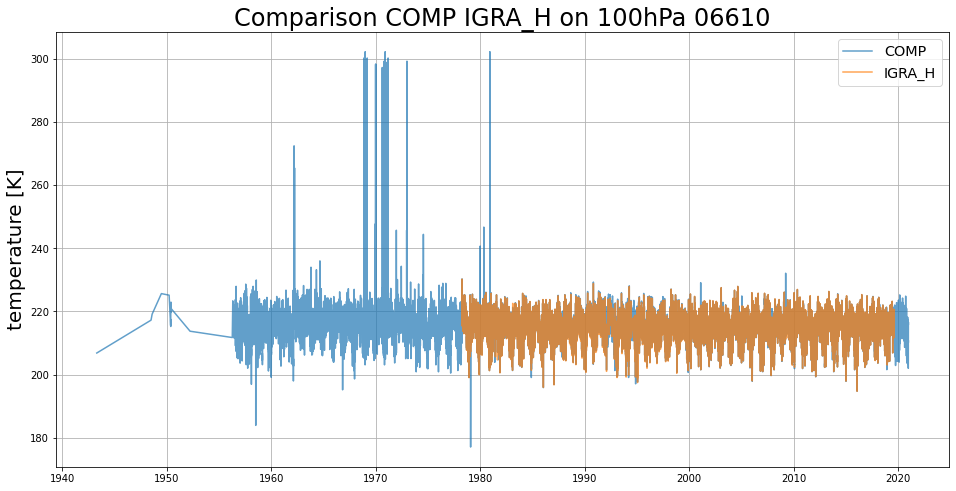

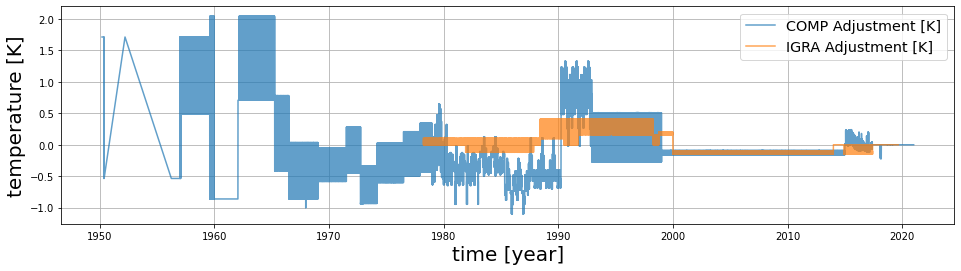

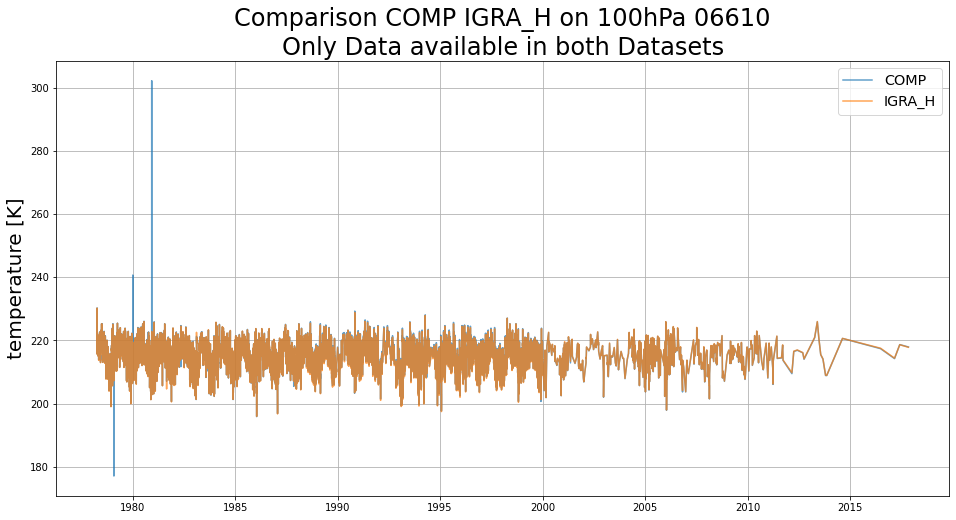

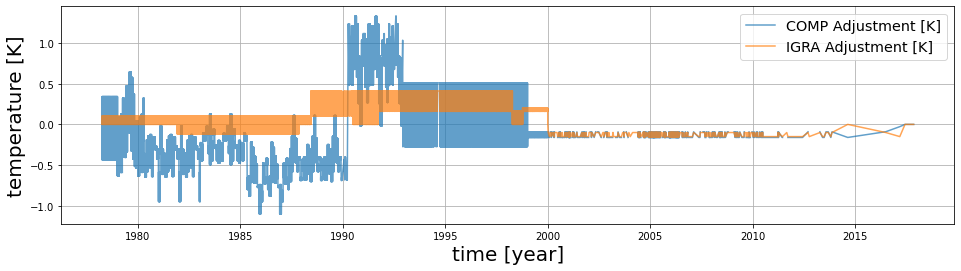

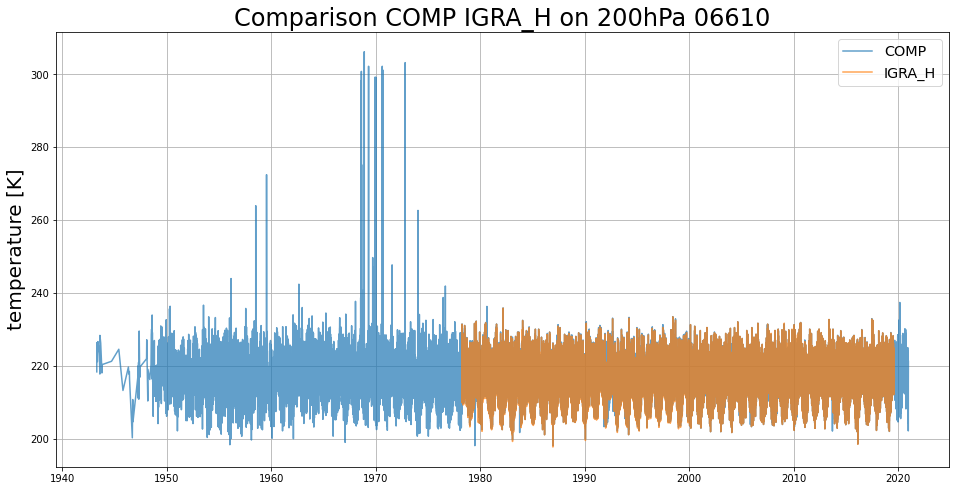

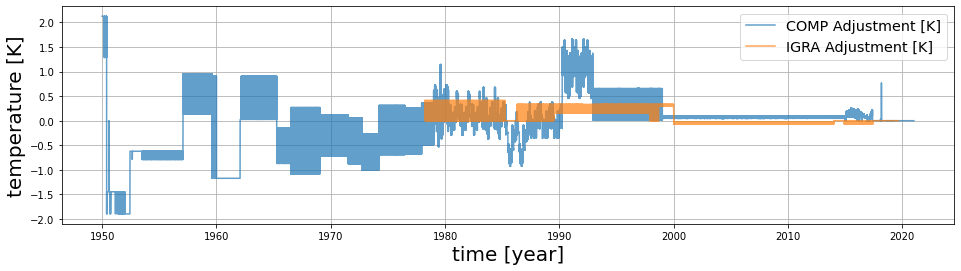

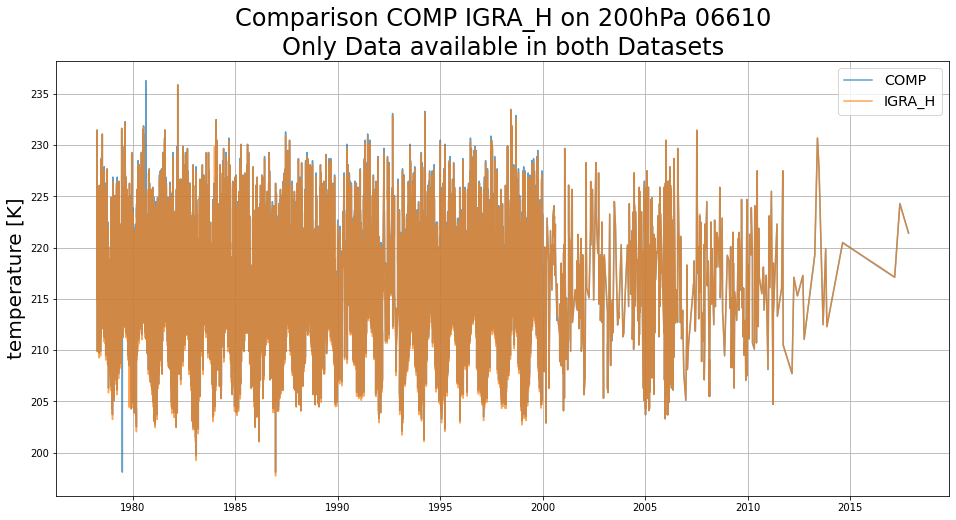

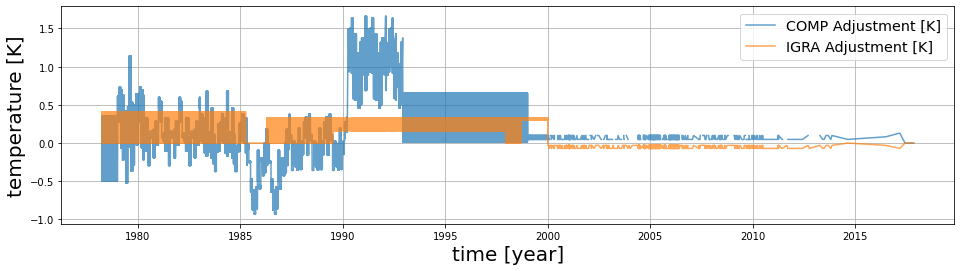

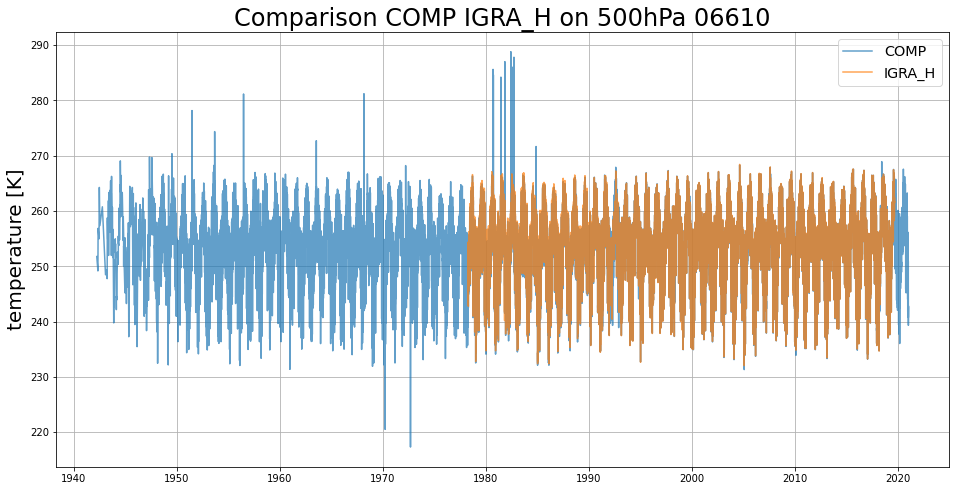

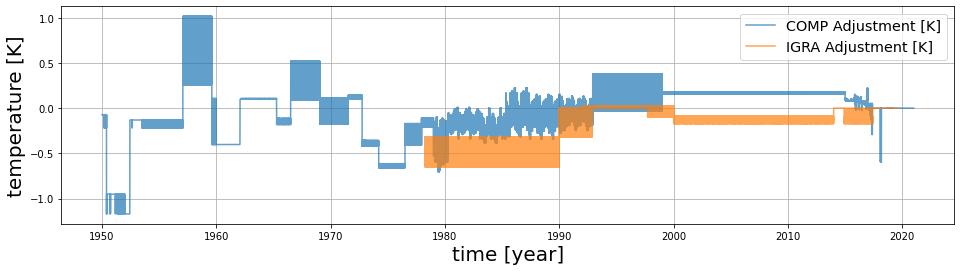

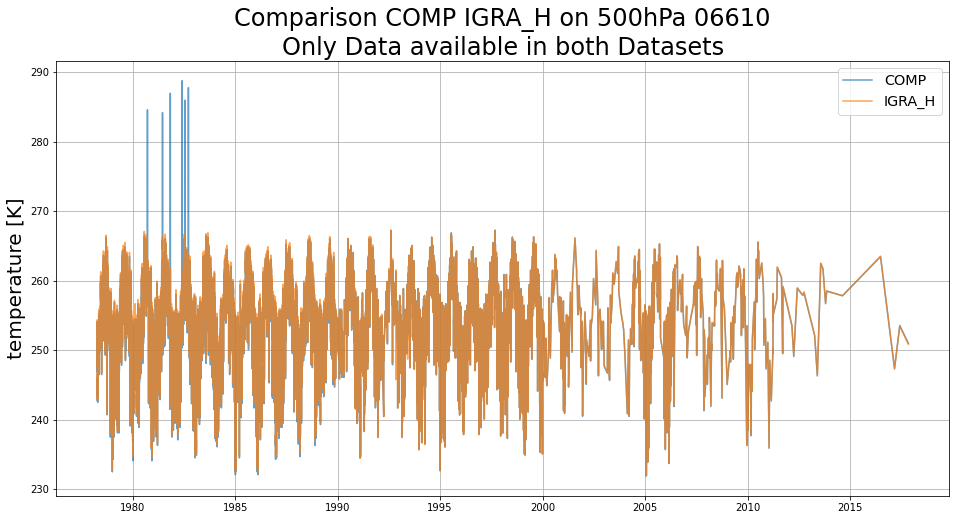

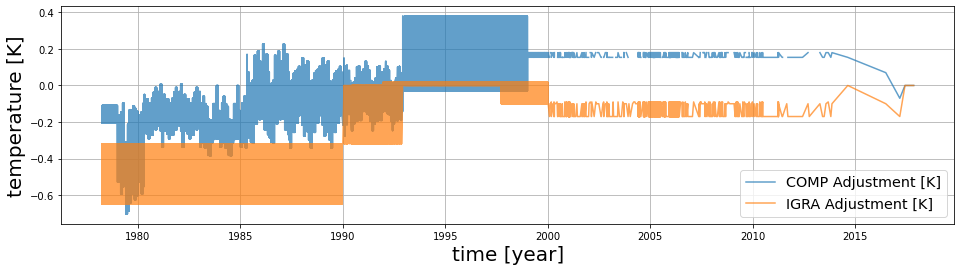

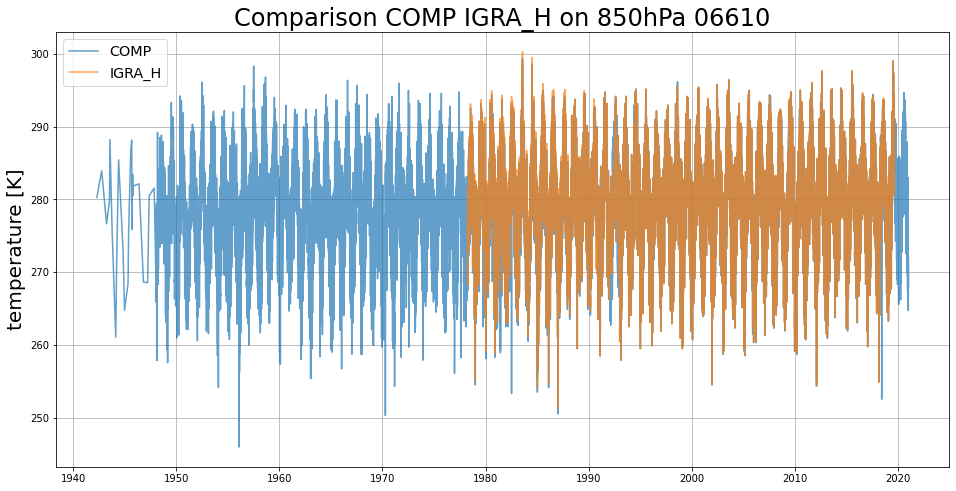

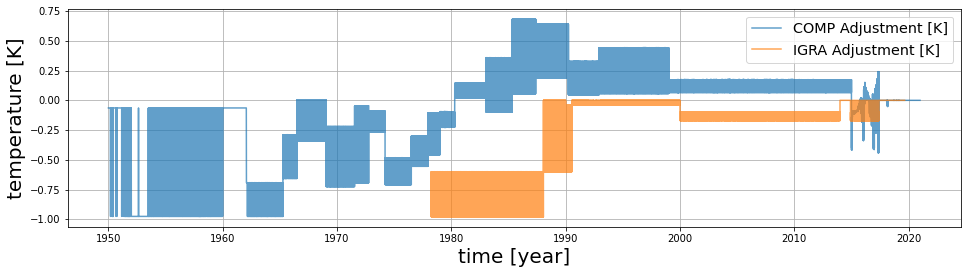

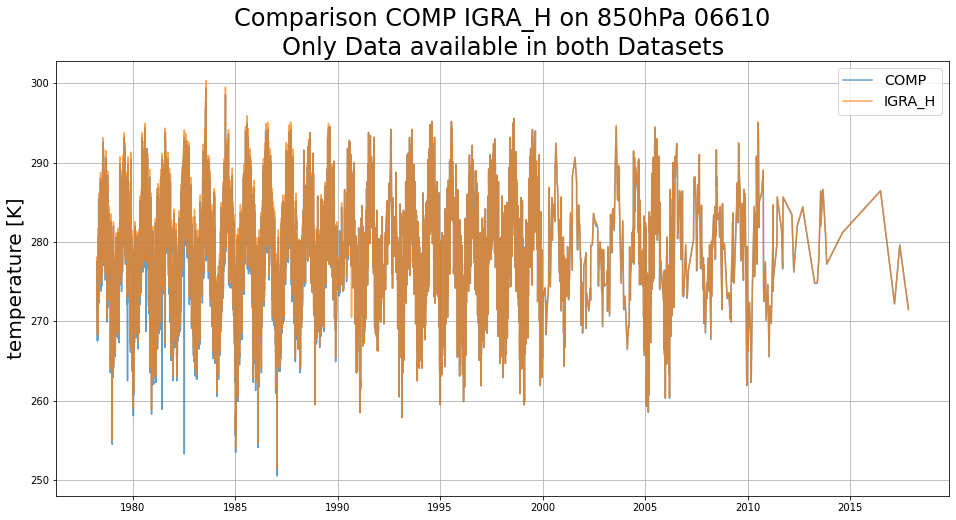

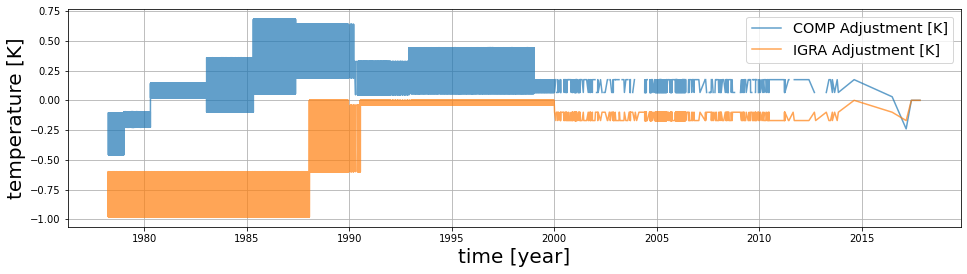

In [19]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_original[i]
    b = igrah_original[i]
    c = comp_original[i]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(b.report_timestamp, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc)
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(b.report_timestamp, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    a = igra_adjusted[i]
    b = igra_h_adjusted[i]
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(xax, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


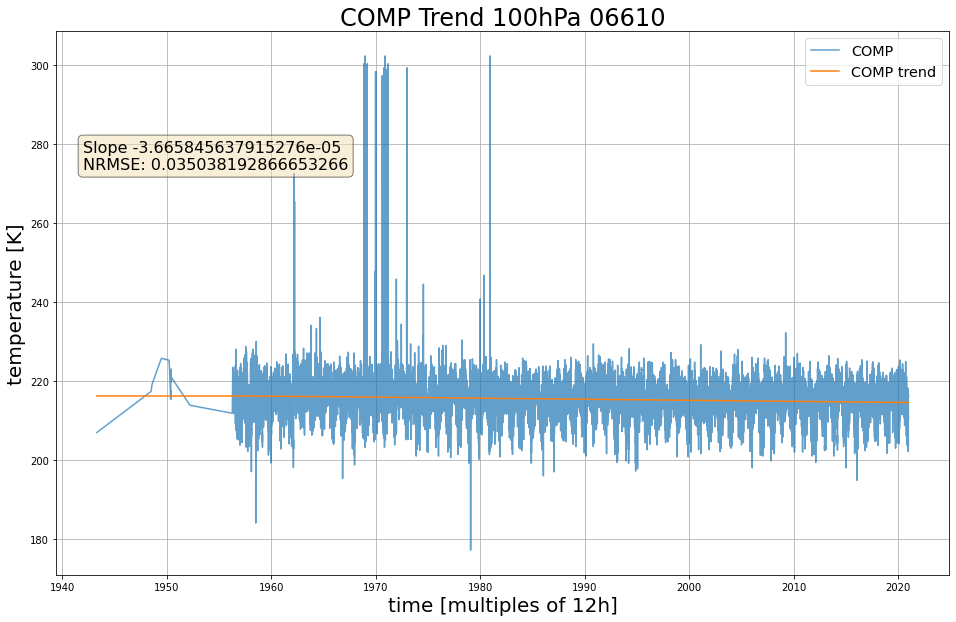

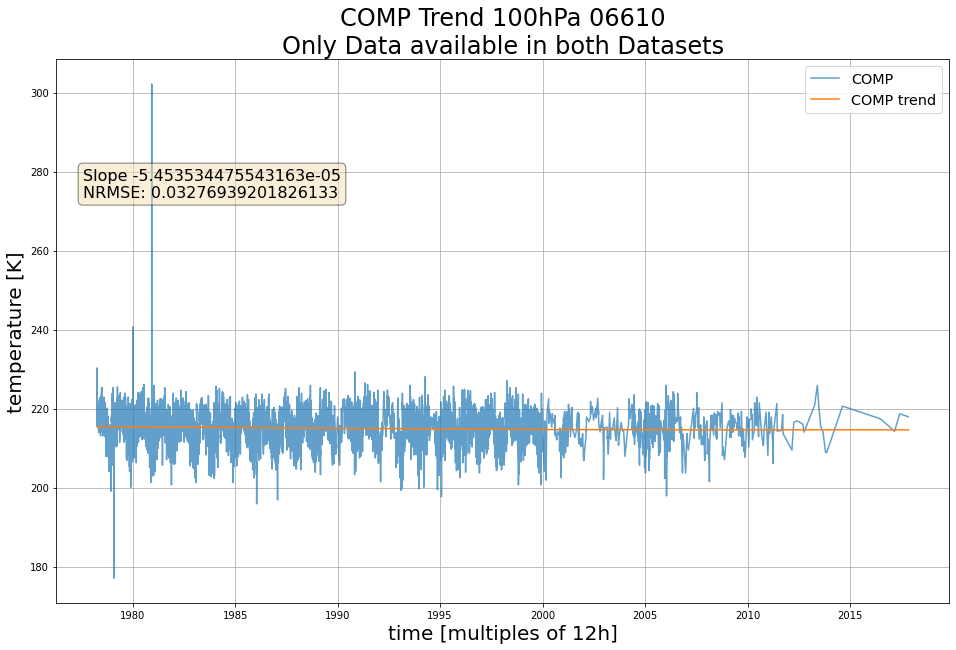

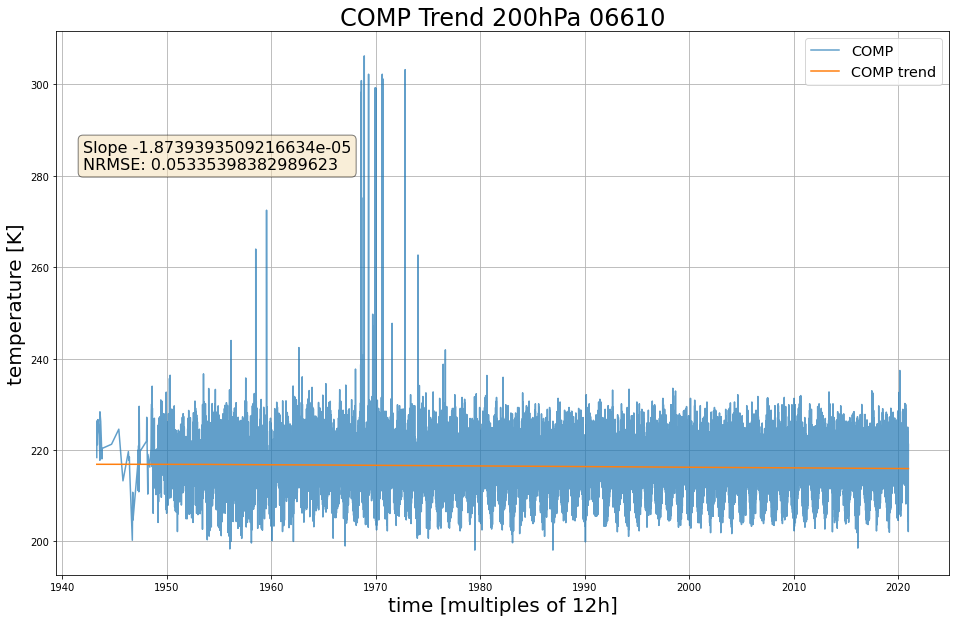

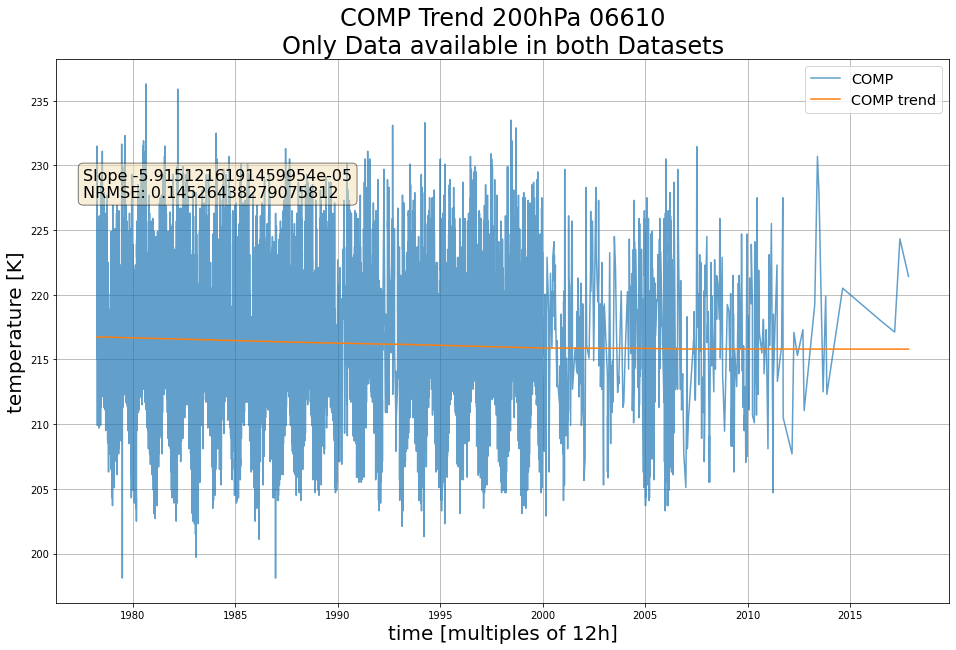

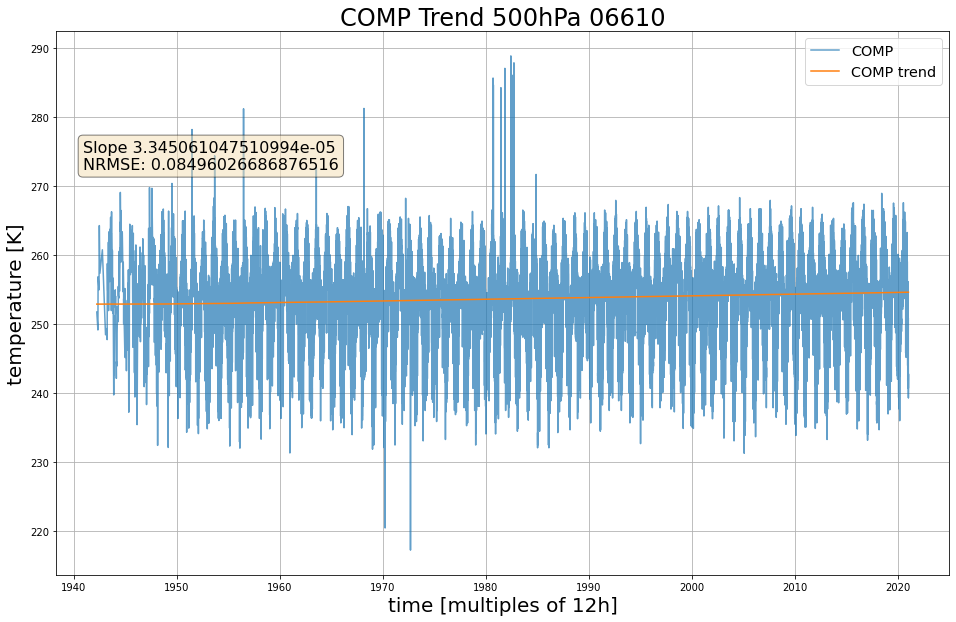

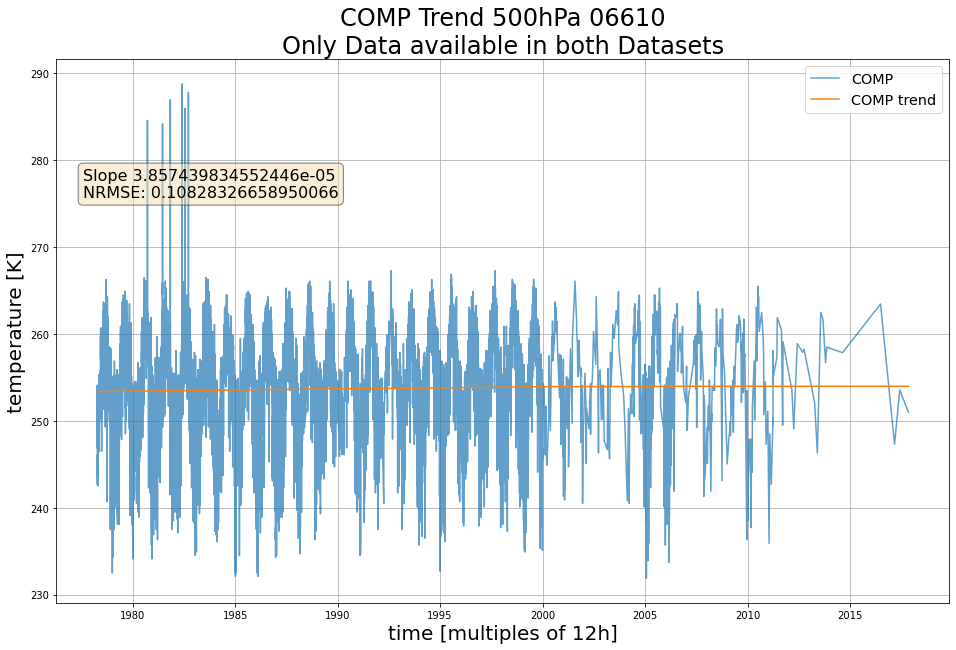

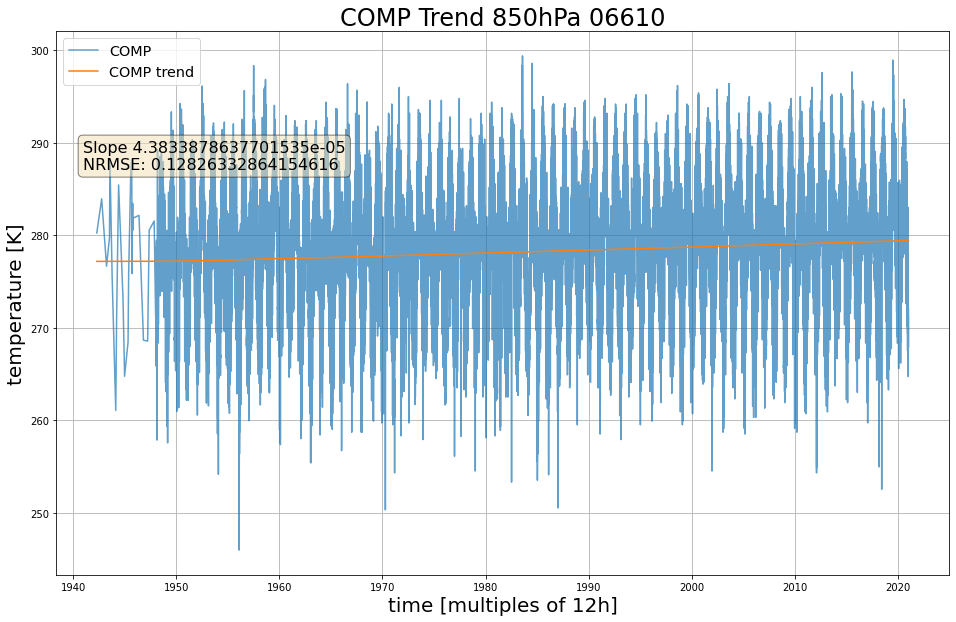

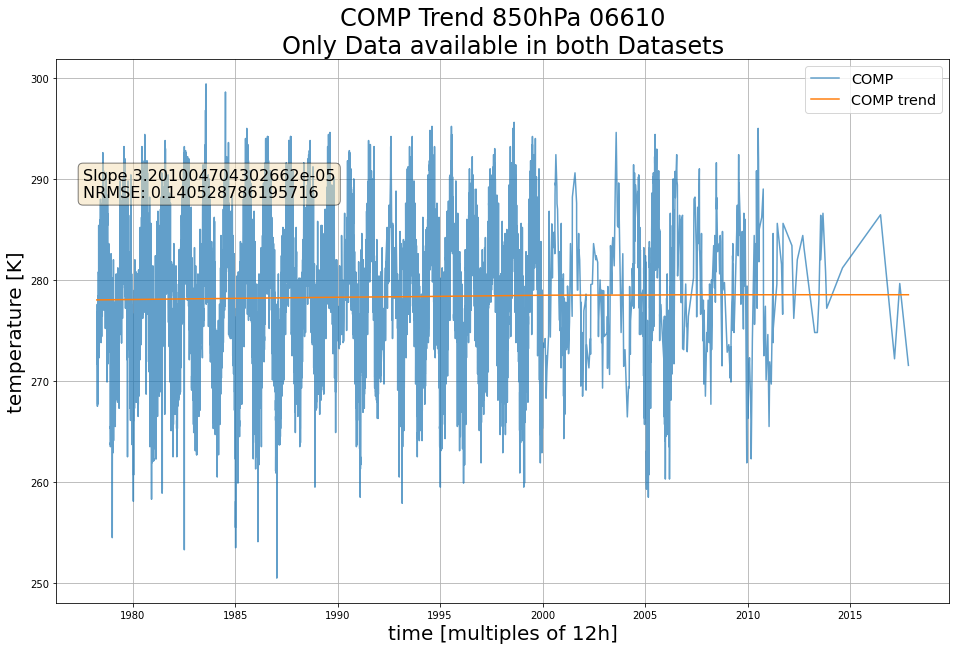

In [20]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = comp_original[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

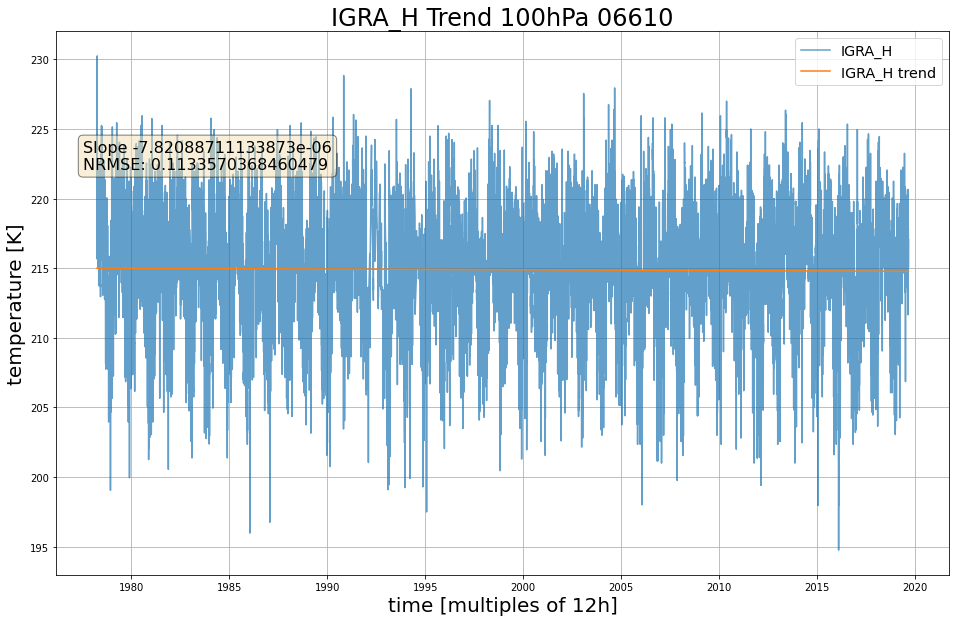

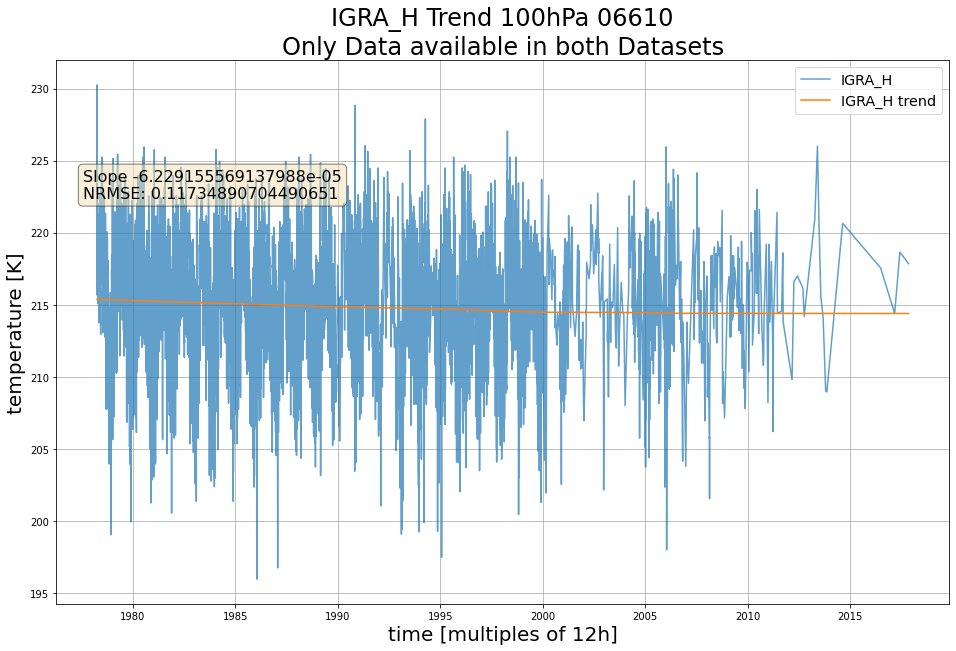

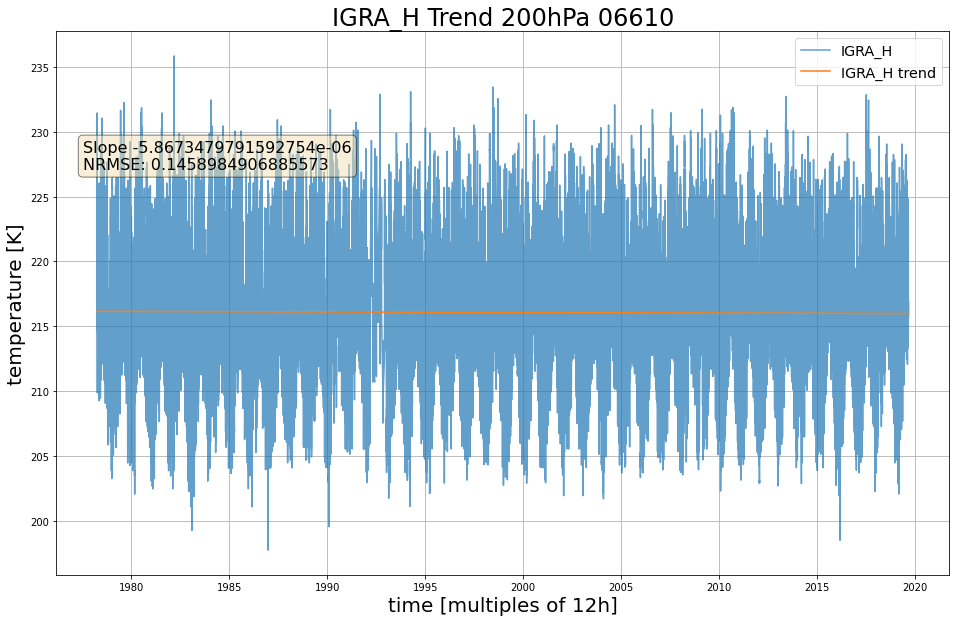

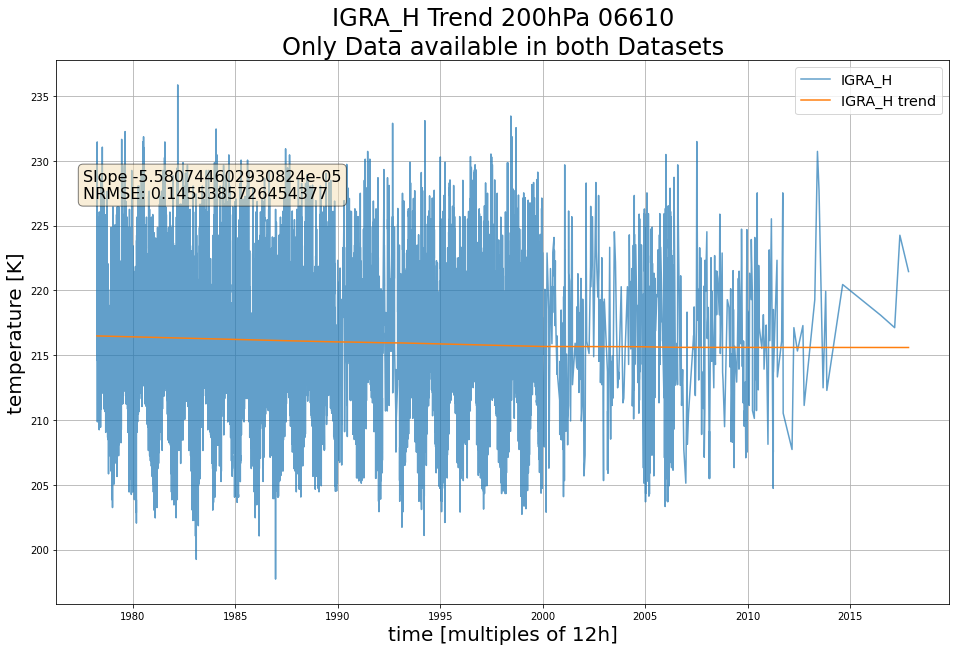

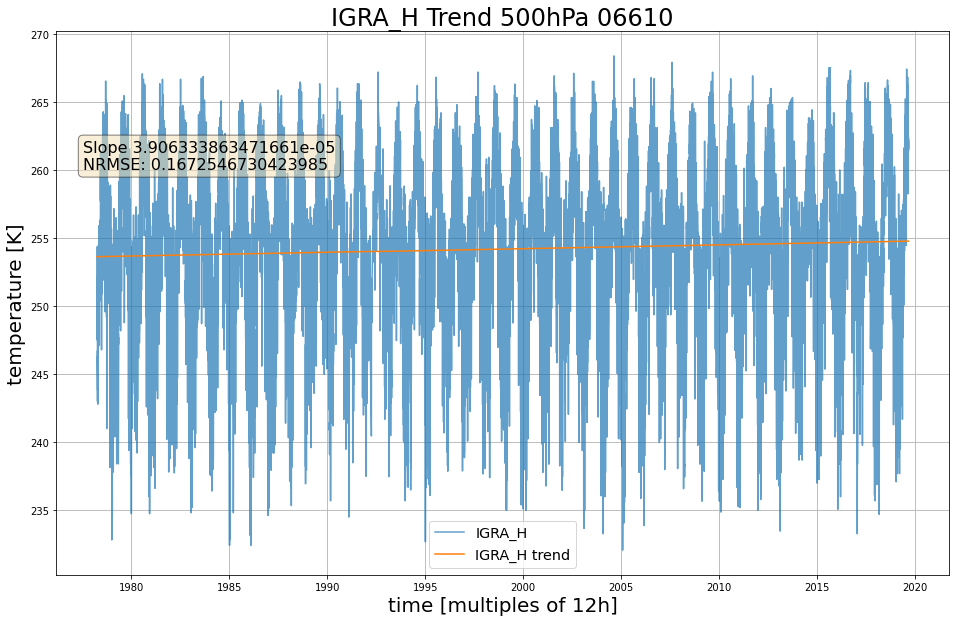

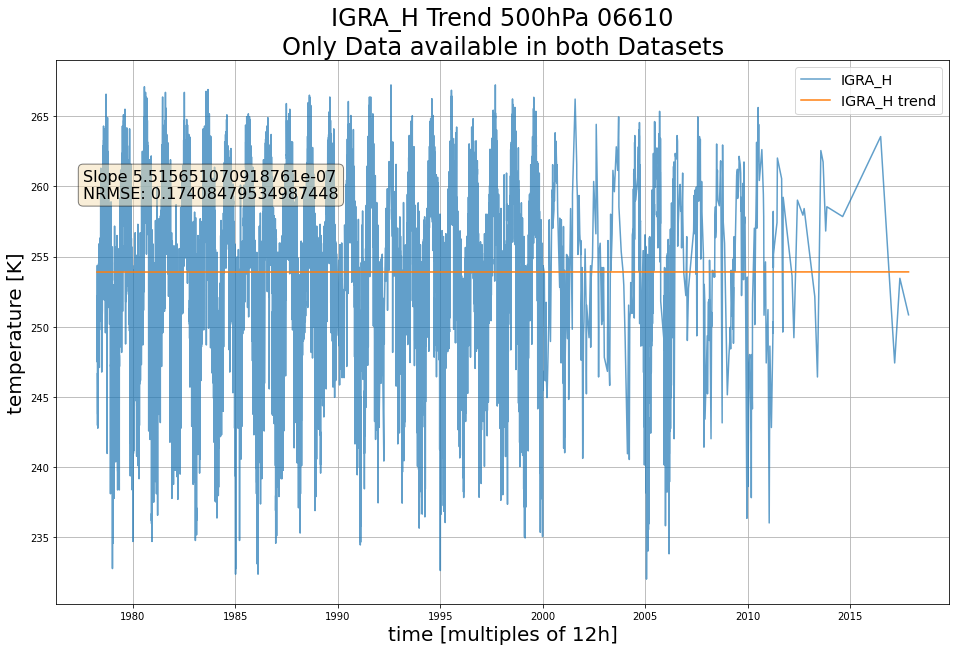

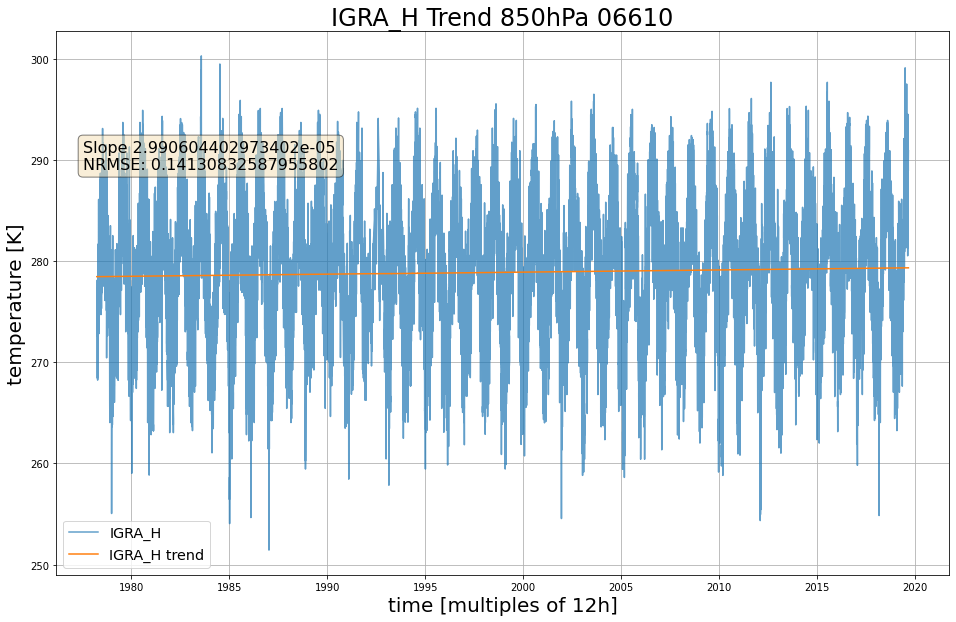

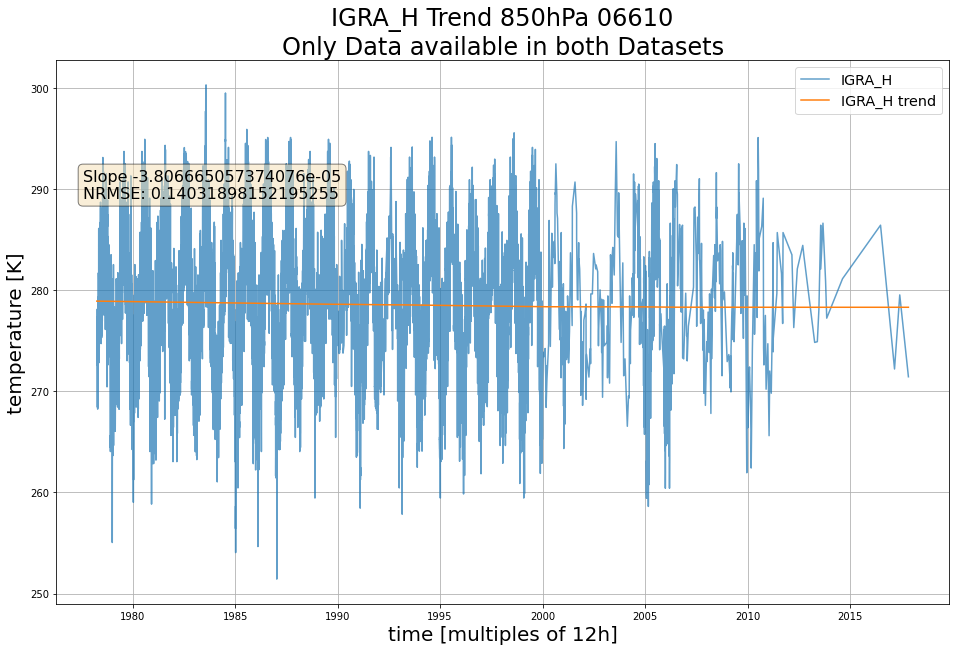

In [21]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = igrah_original[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = igra_h_adjusted[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
Every data set is treated the same way, so they stay comparable.

In [22]:
# reduced data
#
comp_ma = []
igra_h_ma = []
igra_ma = []

for i in range(len(comp_adjusted)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_adjusted[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_adjusted[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_adjusted[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igra_h_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igra_h_adjusted[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

In [23]:
# original data
#
comp_o_ma = []
igrah_o_ma = []
igra_o_ma = []

for i in range(len(comp_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_original[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_o_ma.append(comp_original[i])
    comp_o_ma[i].ta = comp_o_ma[i].ta - rm

    
for i in range(len(igra_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(igra_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_o_ma.append(igra_original[i])
    igra_o_ma[i].air_temperature = igra_o_ma[i].air_temperature - rm
    
    datain = np.asarray(igrah_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igrah_o_ma.append(igrah_original[i])
    igrah_o_ma[i].air_temperature = igrah_o_ma[i].air_temperature - rm

## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

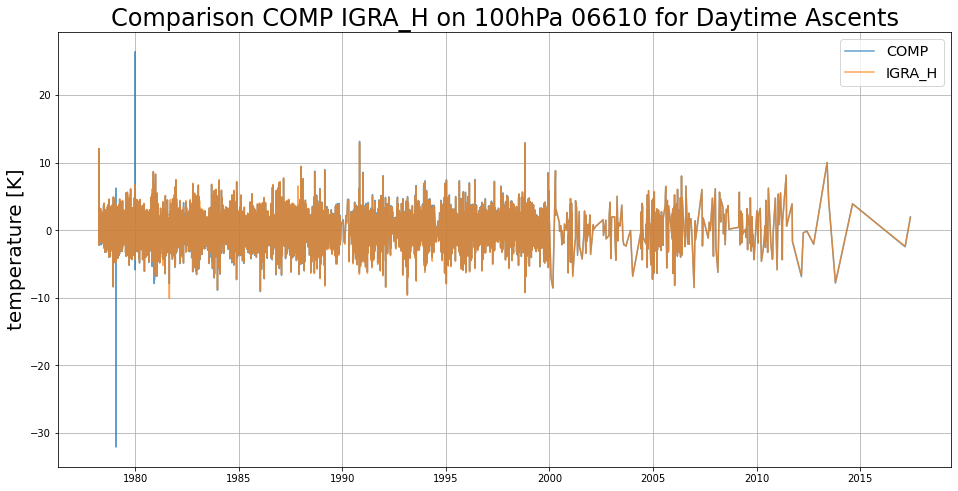

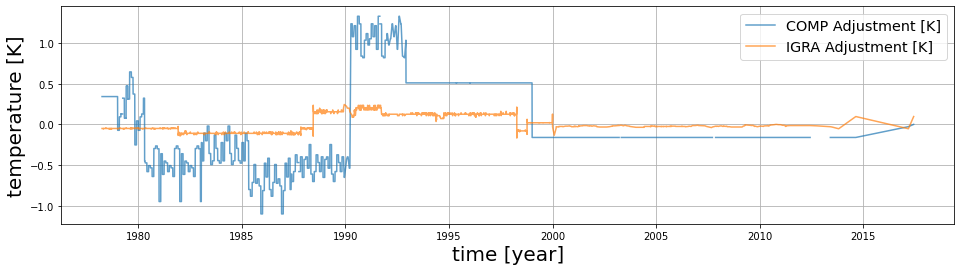

COMP Adjustment MEAN: 0.008148774
COMP Adjustment MIN: -1.0997903
COMP Adjustment MAX: 1.3284929
IGRA Adjustment MEAN: 0.011198351319198972
IGRA Adjustment MIN: -0.16785866873604505
IGRA Adjustment MAX: 0.24357604980463066


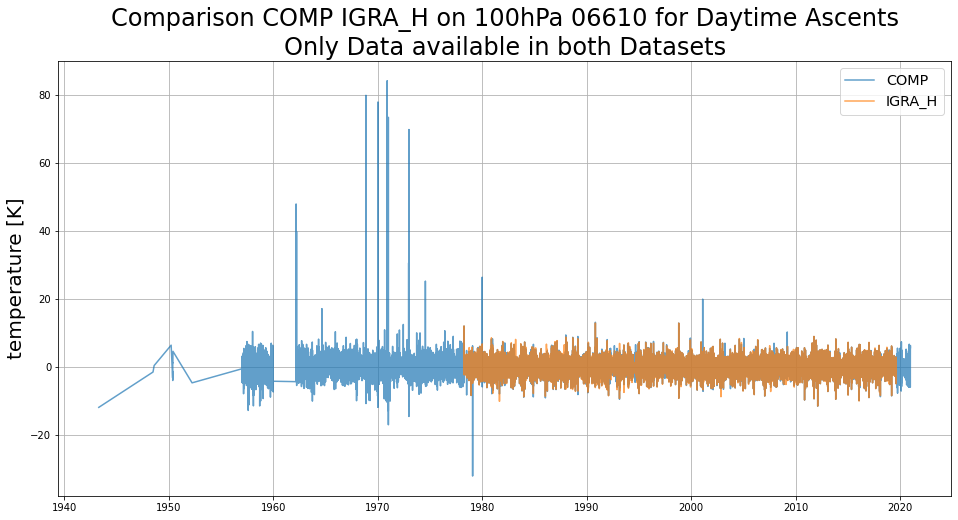

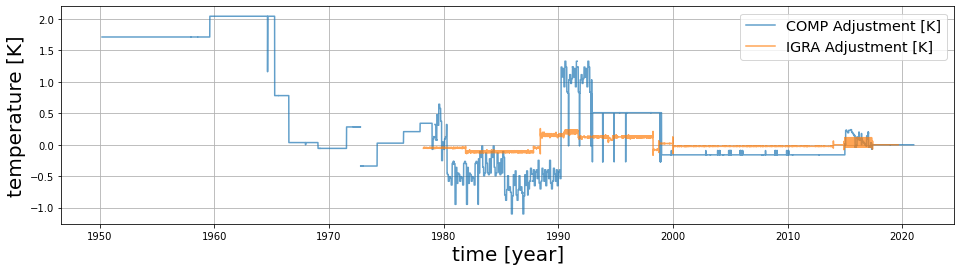

COMP Adjustment MEAN: 0.15743019
COMP Adjustment MIN: -1.0997903
COMP Adjustment MAX: 2.043682
IGRA Adjustment MEAN: -0.0010097646327048328
IGRA Adjustment MIN: -0.16785866873604505
IGRA Adjustment MAX: 0.2578560965401664


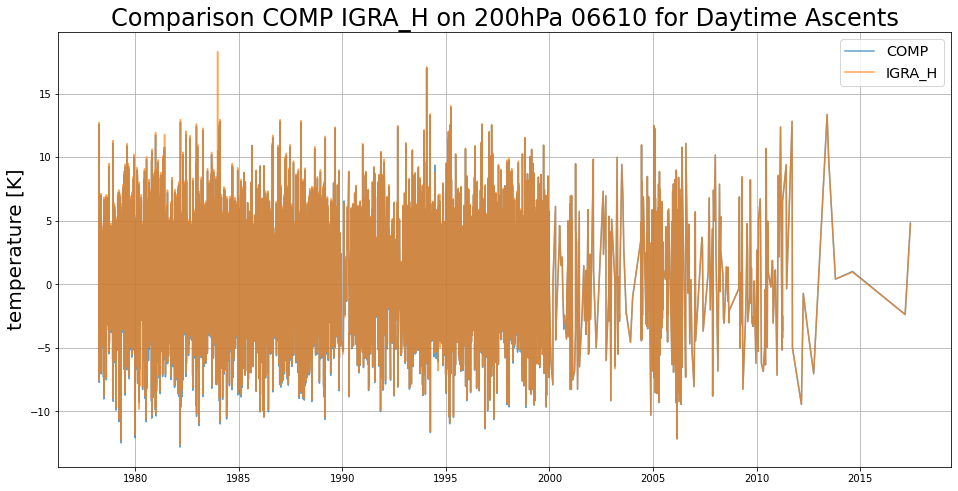

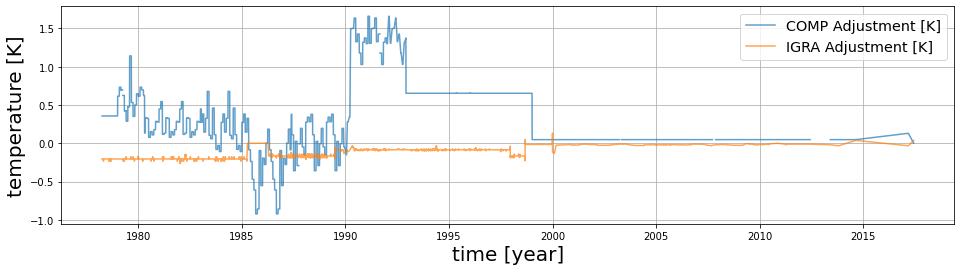

COMP Adjustment MEAN: 0.3651755
COMP Adjustment MIN: -0.92283064
COMP Adjustment MAX: 1.6600555
IGRA Adjustment MEAN: -0.12206959142585623
IGRA Adjustment MIN: -0.26357051304407264
IGRA Adjustment MAX: 0.13357216971263597


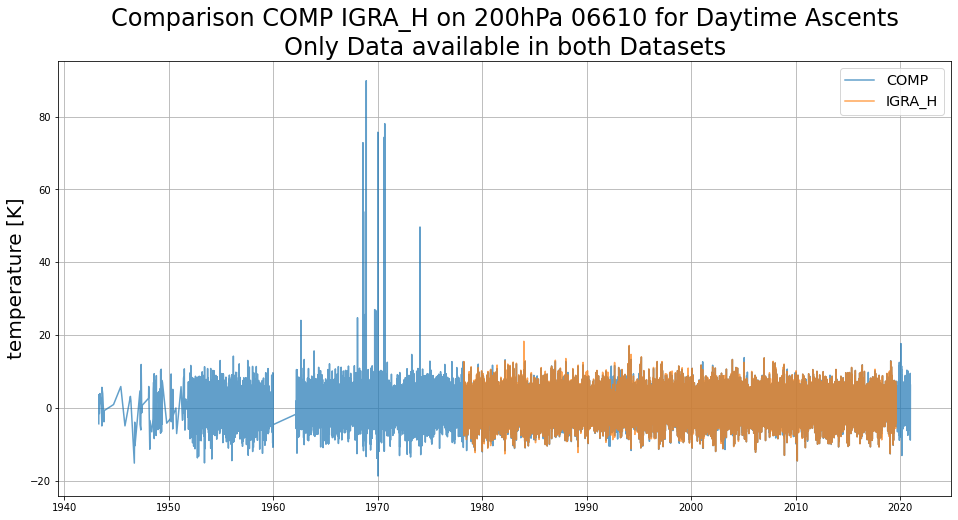

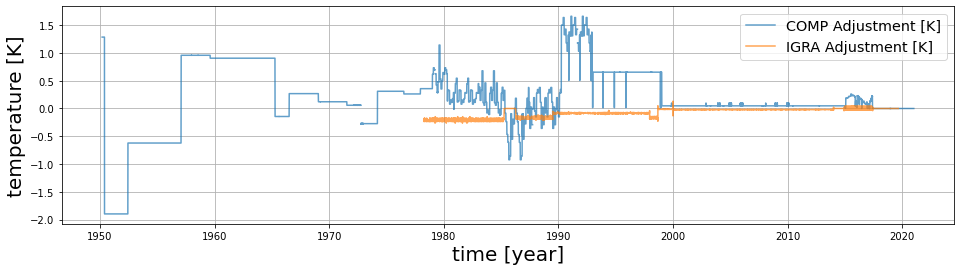

COMP Adjustment MEAN: 0.20943098
COMP Adjustment MIN: -1.8972137
COMP Adjustment MAX: 1.6600555
IGRA Adjustment MEAN: -0.07523935848981463
IGRA Adjustment MIN: -0.26357378278464694
IGRA Adjustment MAX: 0.1321454729352638


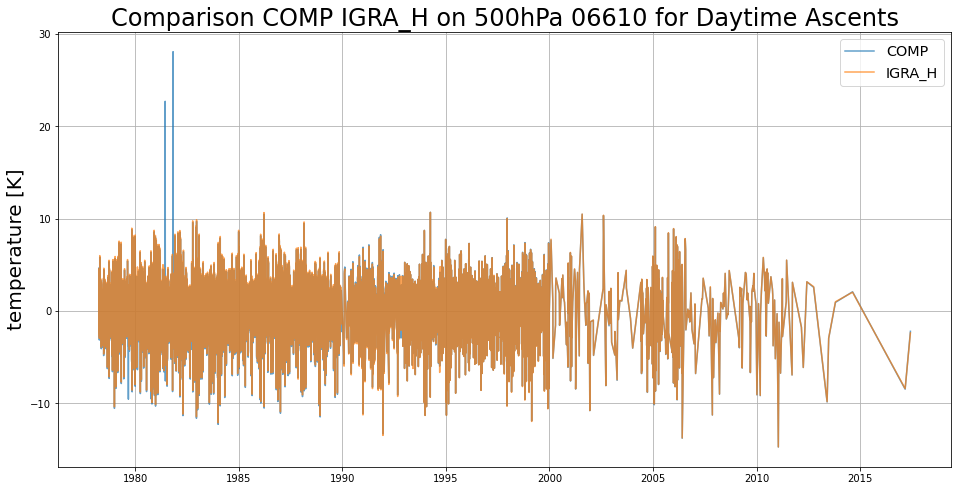

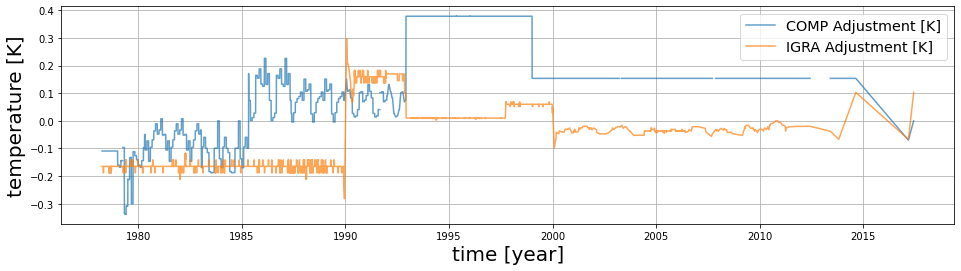

COMP Adjustment MEAN: 0.11324256
COMP Adjustment MIN: -0.33712414
COMP Adjustment MAX: 0.37883478
IGRA Adjustment MEAN: -0.06681143695599935
IGRA Adjustment MIN: -0.28213609967914977
IGRA Adjustment MAX: 0.2985709054129302


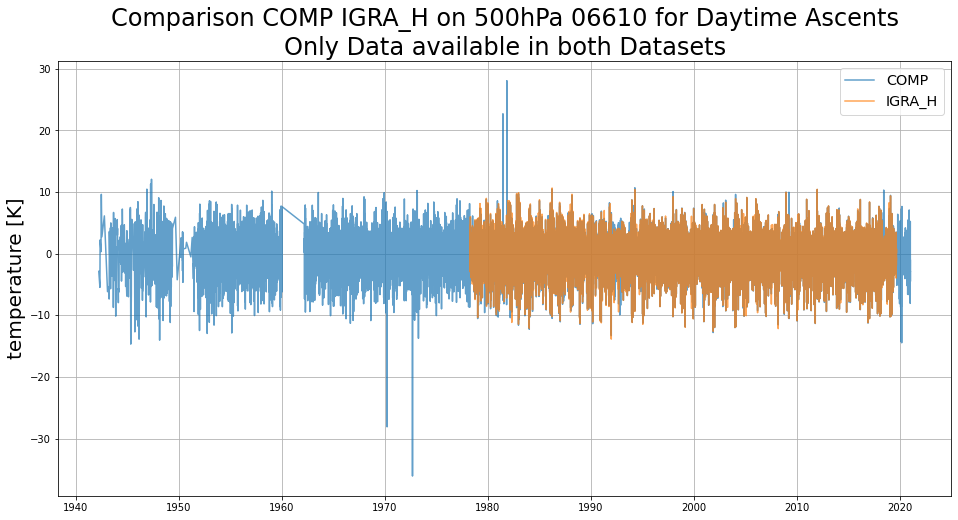

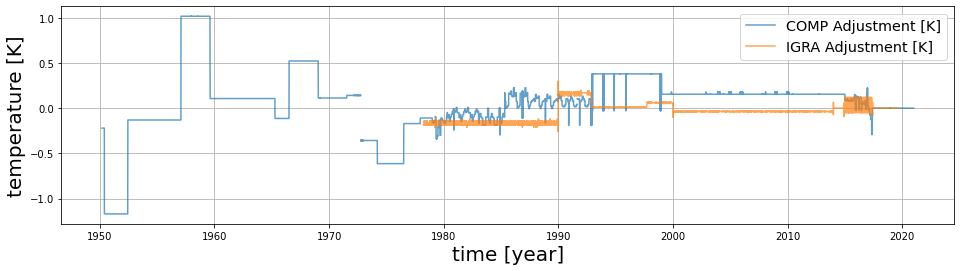

COMP Adjustment MEAN: 0.08843836
COMP Adjustment MIN: -1.1700159
COMP Adjustment MAX: 1.0162839
IGRA Adjustment MEAN: -0.048509265881910235
IGRA Adjustment MIN: -0.25785173688612417
IGRA Adjustment MAX: 0.2992847987584071


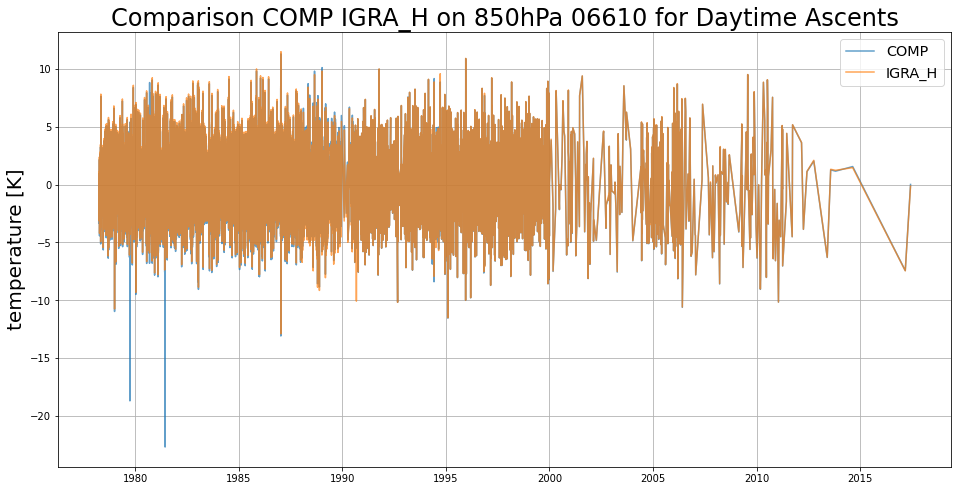

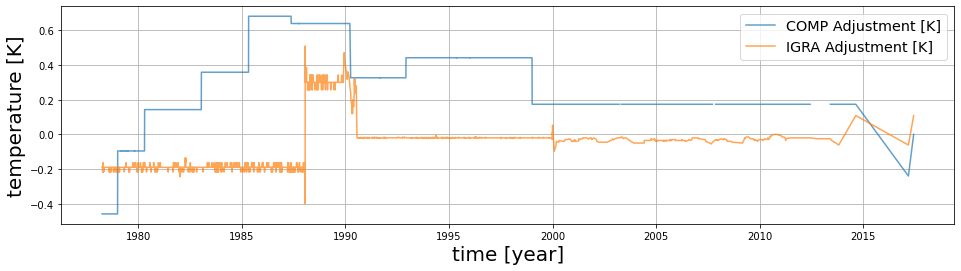

COMP Adjustment MEAN: 0.33436698
COMP Adjustment MIN: -0.45872515
COMP Adjustment MAX: 0.6815231
IGRA Adjustment MEAN: -0.066710233842008
IGRA Adjustment MIN: -0.3999786376953125
IGRA Adjustment MAX: 0.5100032261440219


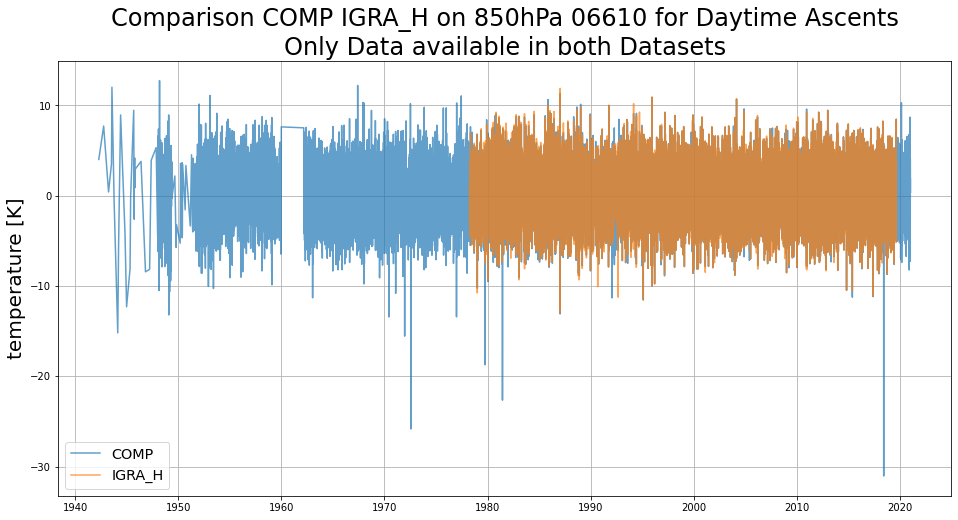

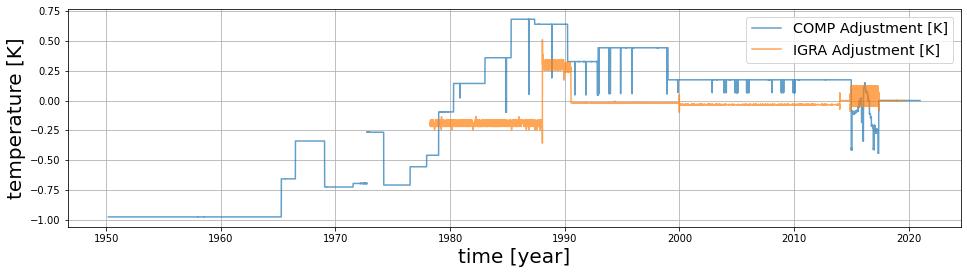

COMP Adjustment MEAN: -0.10321224
COMP Adjustment MIN: -0.97566414
COMP Adjustment MAX: 0.6815231
IGRA Adjustment MEAN: -0.046040624928334654
IGRA Adjustment MIN: -0.3571210588727922
IGRA Adjustment MAX: 0.5100032261439083


In [32]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour >= 6][a.report_timestamp.dt.hour < 18]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour >= 6][b.report_timestamp.dt.hour < 18]
    c = comp_ma[i]
    c = c[c.time.dt.hour >= 6][c.time.dt.hour < 18]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour >= 6]
    a = a[a.report_timestamp.dt.hour < 18]
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour >= 6]
    b = b[b.report_timestamp.dt.hour < 18]
    c = comp_o_ma[i]
    c = c[c.time.dt.hour >= 6]
    c = c[c.time.dt.hour < 18]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

In [25]:
a = igra_o_ma[0]
a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour > 18])

station_name    report_timestamp  report_id  longitude   latitude  \
1        SZM00006610 1978-04-01 00:00:00   28315581     6.9425  46.811699   
93       SZM00006610 1978-04-02 00:00:00   28315603     6.9425  46.811699   
186      SZM00006610 1978-04-03 00:00:00   28298798     6.9425  46.811699   
265      SZM00006610 1978-04-04 00:00:00   28298815     6.9425  46.811699   
346      SZM00006610 1978-04-05 00:00:00   28298833     6.9425  46.811699   
...              ...                 ...        ...        ...        ...   
1943280  SZM00006610 2008-11-15 23:00:00   28292701     6.9425  46.811699   
2021472  SZM00006610 2009-08-29 23:00:00   28289575     6.9425  46.811699   
2029098  SZM00006610 2009-09-26 23:00:00   28290691     6.9425  46.811699   
2034955  SZM00006610 2009-10-19 23:00:00   28291514     6.9425  46.811699   
2046275  SZM00006610 2009-11-28 23:00:00   28293134     6.9425  46.811699   

         air_pressure  air_temperature             actual_time  \
1             10000.0         0.085720  1978-04-01 00:00:00+00   
93            10000.0         0.085720  1978-04-02 00:00:00+00   
186           10000.0        -0.114293  1978-04-03 00:00:00+00   
265           10000.0        -2.114293  1978-04-04 00:00:00+00   
346           10000.0        -0.685708  1978-04-05 00:00:00+00   
...               ...              ...                     ...   
1943280       10000.0        -3.671426  2008-11-15 23:00:00+00   
2021472       10000.0         2.414287  2009-08-29 23:00:00+00   
2029098       10000.0         1.071436  2009-09-26 23:00:00+00   
2034955       10000.0        -1.671434  2009-10-19 23:00:00+00   
2046275       10000.0        -1.942858  2009-11-28 23:00:00+00   

         height_of_station_above_sea_level  
1                                    490.0  
93                                   490.0  
186                                  490.0  
265                                  490.0  
346                                  490.0  
...                                    ...  
1943280                              490.0  
2021472                              490.0  
2029098                              490.0  
2034955                              490.0  
2046275                              490.0  

[14430 rows x 9 columns]

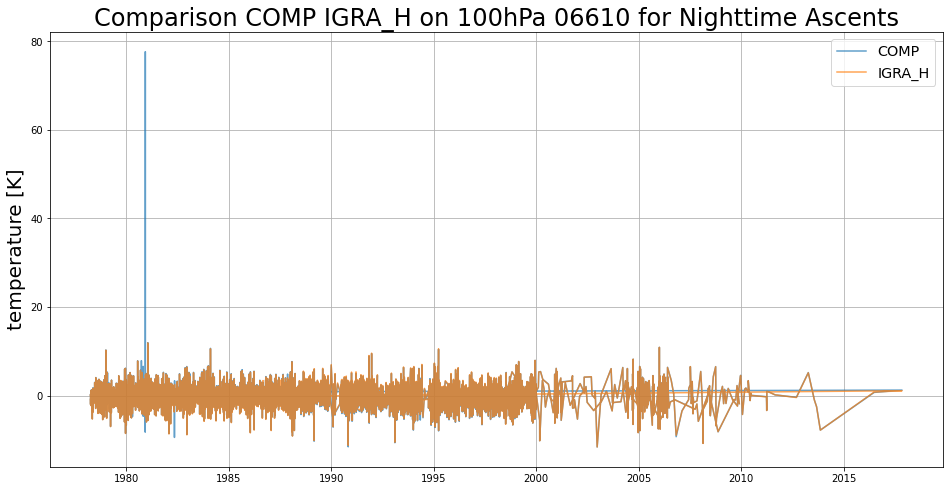

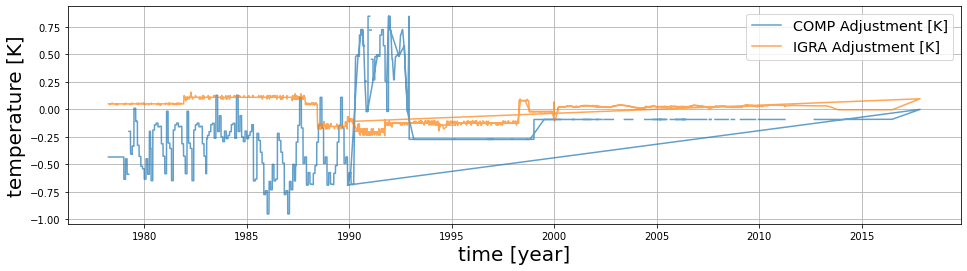

COMP Adjustment MEAN: -0.2367312
COMP Adjustment MIN: -0.95040077
COMP Adjustment MAX: 0.84682024
IGRA Adjustment MEAN: -0.011241277871732276
IGRA Adjustment MIN: -0.23928724016460023
IGRA Adjustment MAX: 0.15713391985212866


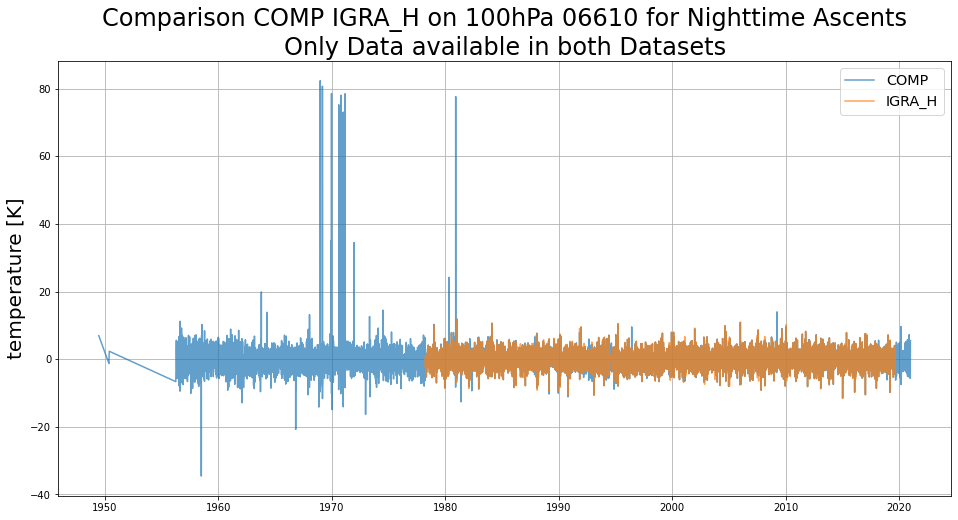

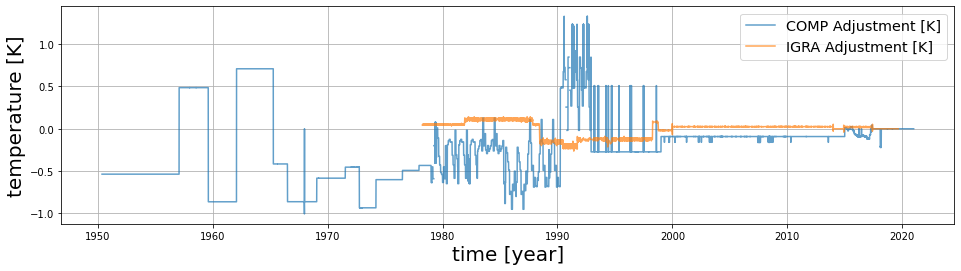

COMP Adjustment MEAN: -0.20483053
COMP Adjustment MIN: -1.0051478
COMP Adjustment MAX: 1.3284929
IGRA Adjustment MEAN: 0.0010098683835257176
IGRA Adjustment MIN: -0.26357269287106533
IGRA Adjustment MAX: 0.14143698556085837


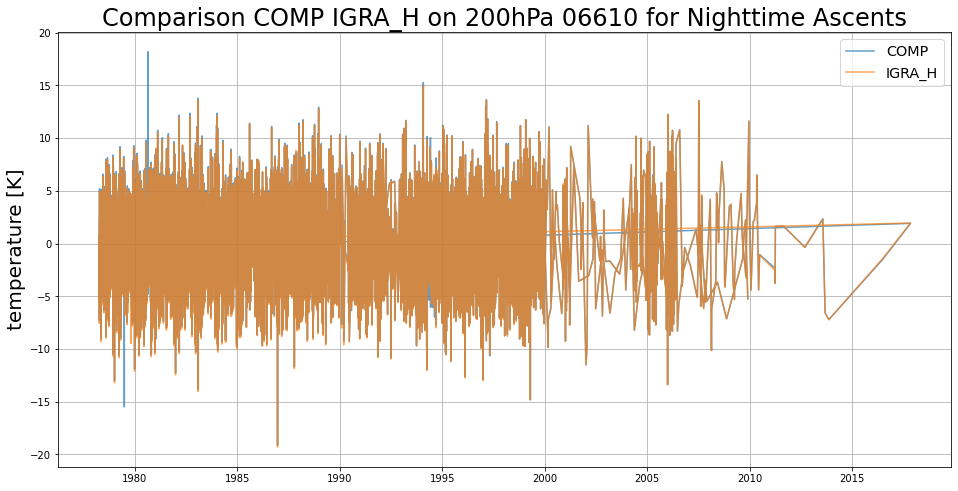

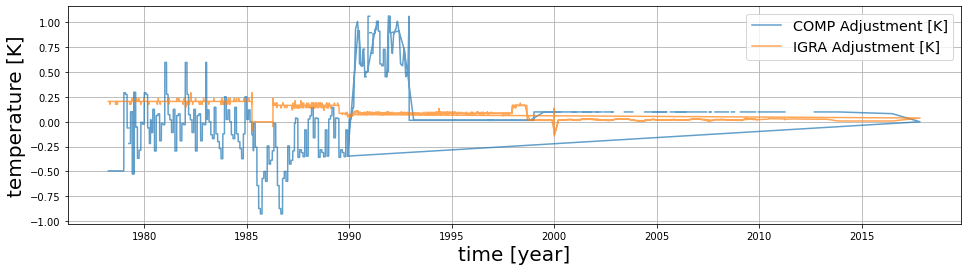

COMP Adjustment MEAN: -0.0041729854
COMP Adjustment MIN: -0.92741144
COMP Adjustment MAX: 1.0623102
IGRA Adjustment MEAN: 0.12230251452909652
IGRA Adjustment MIN: -0.14285932268413148
IGRA Adjustment MAX: 0.29286084856306616


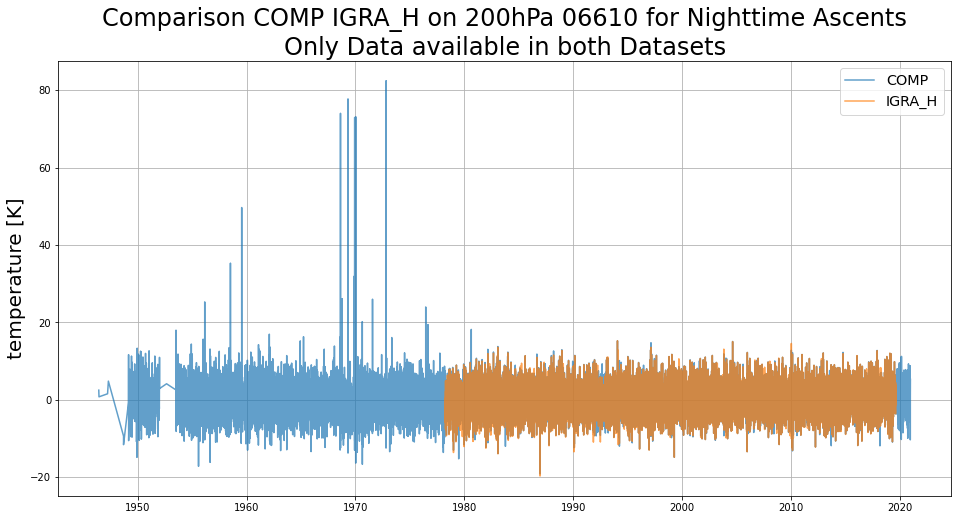

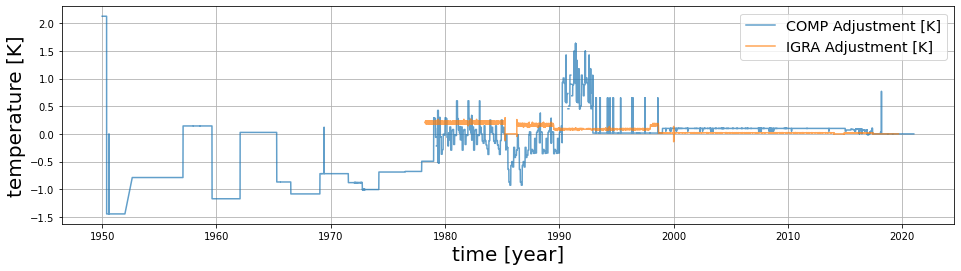

COMP Adjustment MEAN: -0.20865868
COMP Adjustment MIN: -1.4462887
COMP Adjustment MAX: 2.1260197
IGRA Adjustment MEAN: 0.07530627407583669
IGRA Adjustment MIN: -0.14214324951174717
IGRA Adjustment MAX: 0.29286084856306616


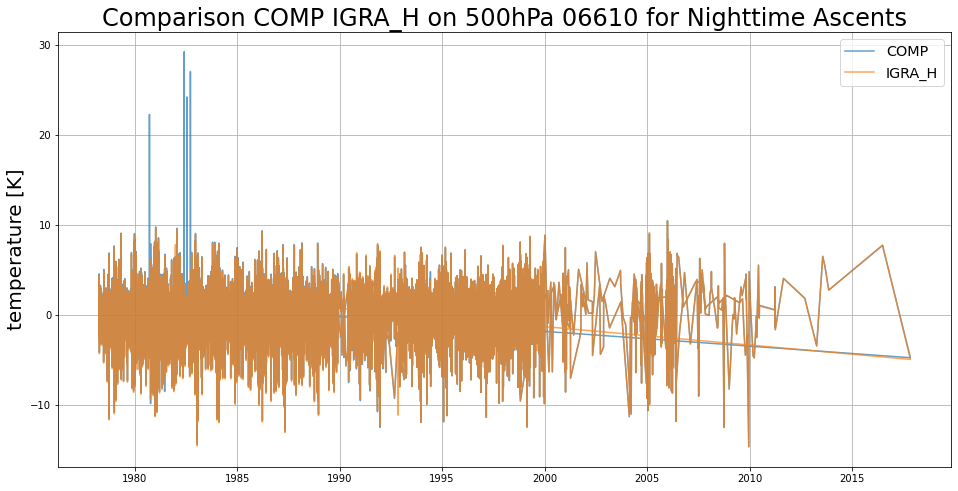

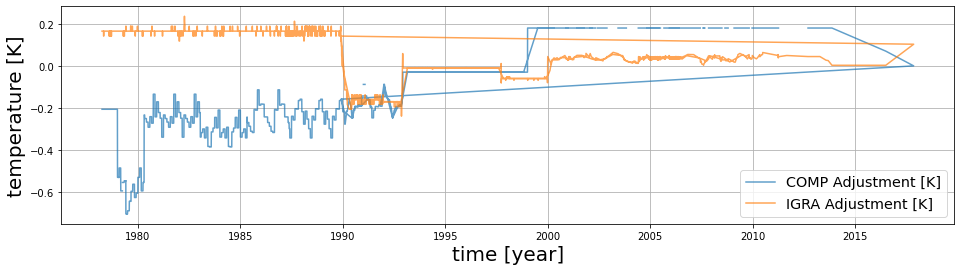

COMP Adjustment MEAN: -0.1517161
COMP Adjustment MIN: -0.70299494
COMP Adjustment MAX: 0.17975618
IGRA Adjustment MEAN: 0.06692914708233472
IGRA Adjustment MIN: -0.2385777064732224
IGRA Adjustment MAX: 0.23572322300498172


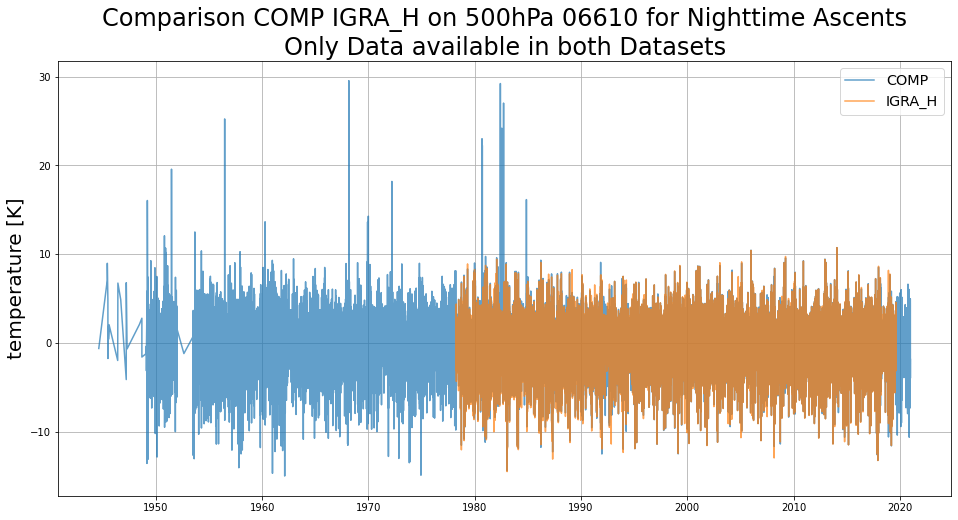

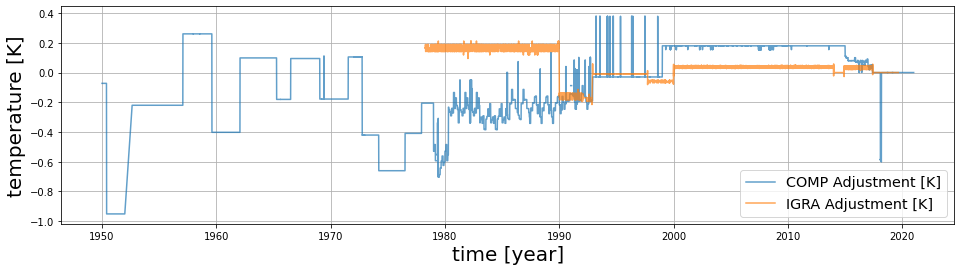

COMP Adjustment MEAN: -0.087341875
COMP Adjustment MIN: -0.95158833
COMP Adjustment MAX: 0.37883466
IGRA Adjustment MEAN: 0.048548028097224534
IGRA Adjustment MIN: -0.21571895054407264
IGRA Adjustment MAX: 0.21215275355743302


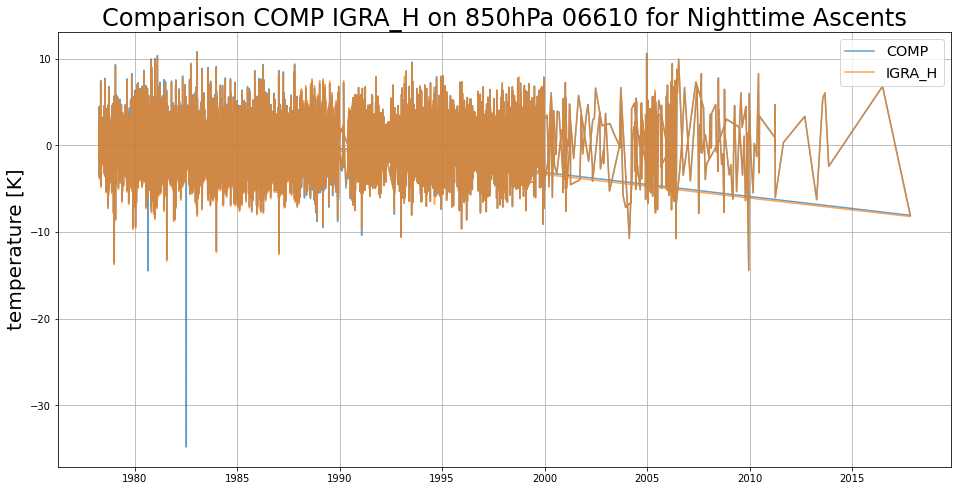

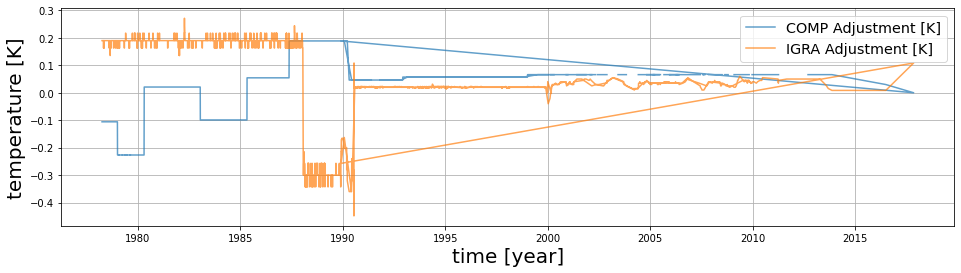

COMP Adjustment MEAN: 0.029451521
COMP Adjustment MIN: -0.22669029
COMP Adjustment MAX: 0.18877482
IGRA Adjustment MEAN: 0.06685172234049001
IGRA Adjustment MIN: -0.4485757010323823
IGRA Adjustment MAX: 0.27145167759482547


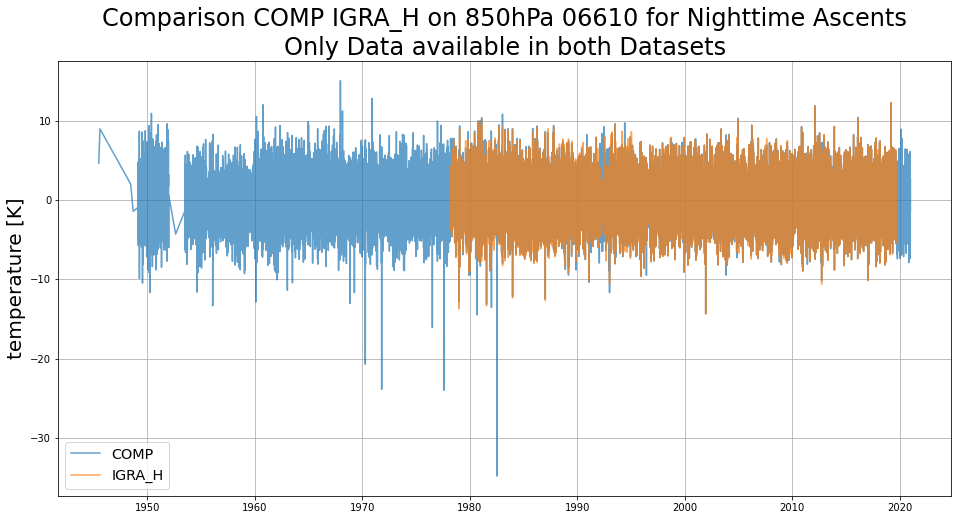

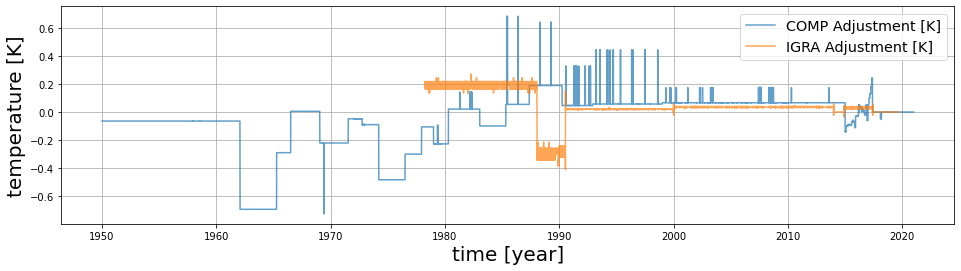

COMP Adjustment MEAN: -0.04921046
COMP Adjustment MIN: -0.72492313
COMP Adjustment MAX: 0.68152285
IGRA Adjustment MEAN: 0.04608681168052279
IGRA Adjustment MIN: -0.4085758754185349
IGRA Adjustment MAX: 0.27145167759482547


In [31]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour >= 18])
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour < 6].append(b[b.report_timestamp.dt.hour >= 18])
    c = comp_ma[i]
    c = c[c.time.dt.hour < 6].append(c[c.time.dt.hour >=18])
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour < 6].append(b[b.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    c = comp_o_ma[i]
    c = c[c.time.dt.hour < 6].append(c[c.time.dt.hour >= 18]).sort_values('time')
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

## Difference:

Finding the difference between the two data sets by subtracting them.

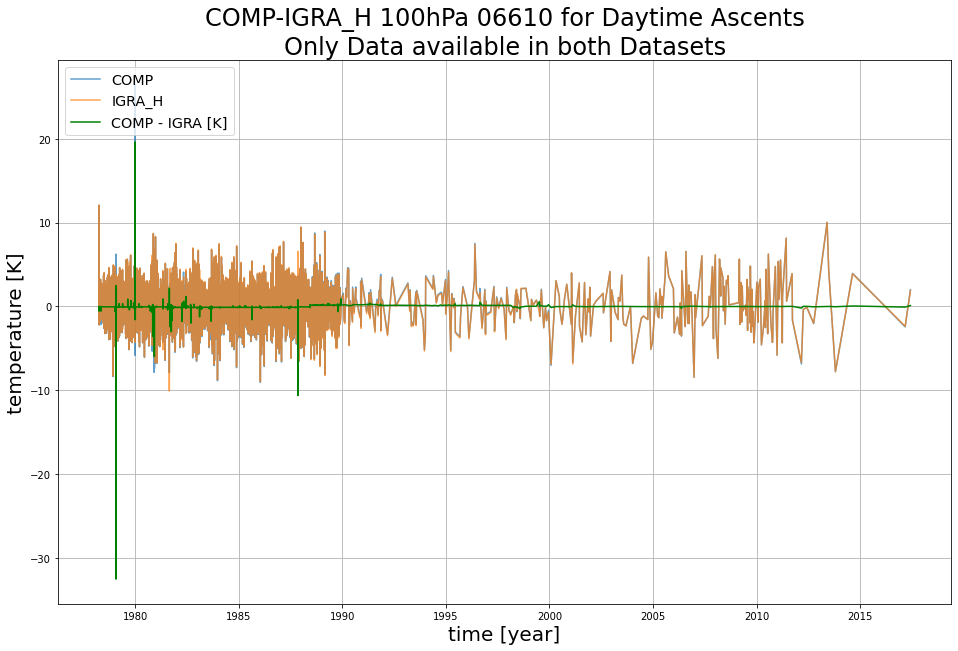

DIFF MEAN: -0.0628836673078172
DIFF MIN: -32.54999542236328
DIFF MAX: 19.635716029575832


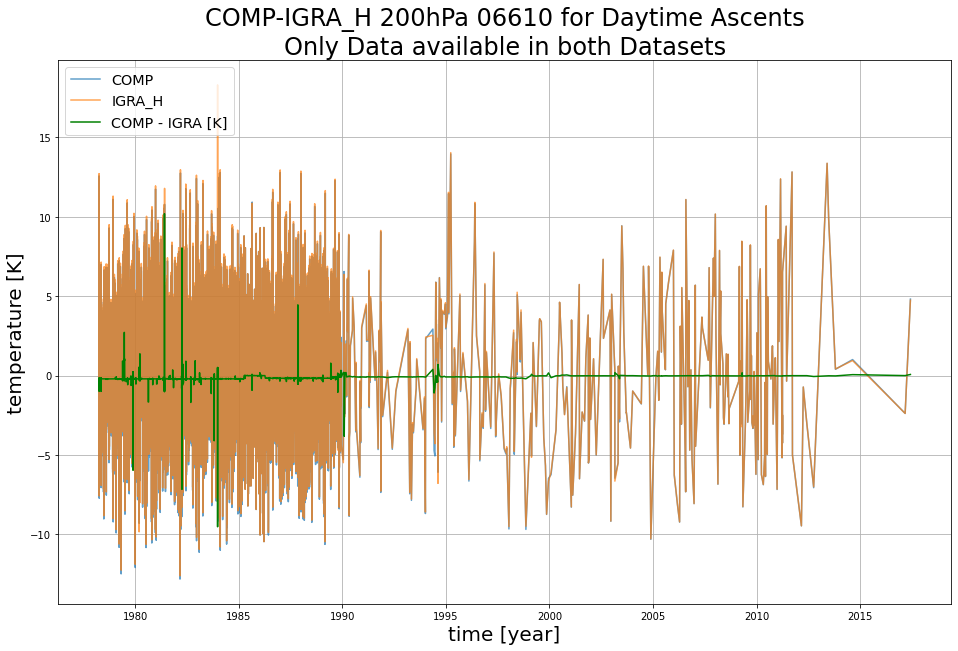

DIFF MEAN: -0.1645642245755137
DIFF MIN: -9.520011901855412
DIFF MAX: 10.19500187465124


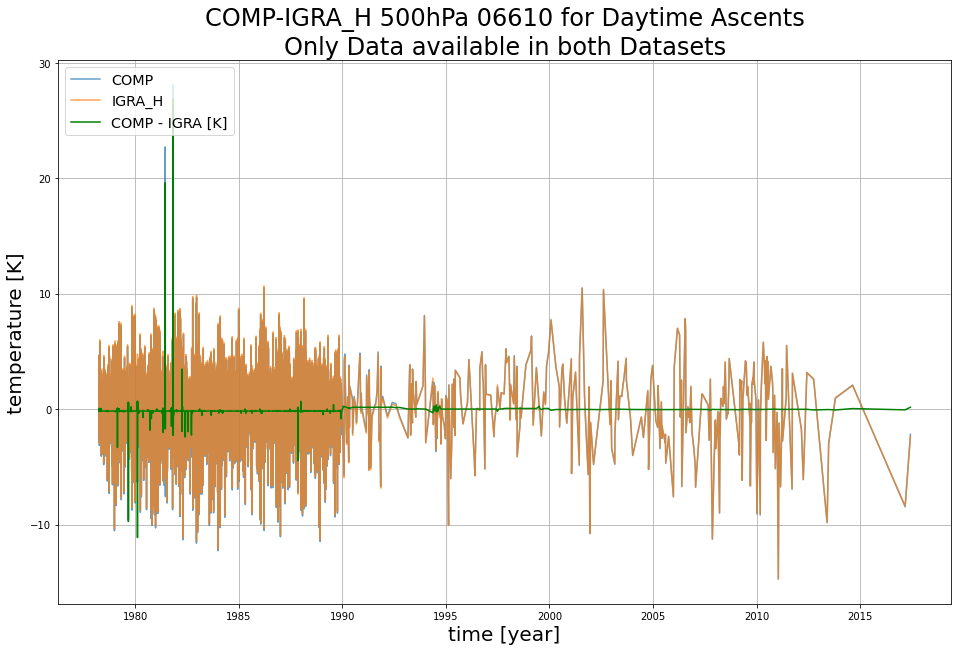

DIFF MEAN: -0.1621364247822521
DIFF MIN: -11.12214987618583
DIFF MAX: 26.85643223353793


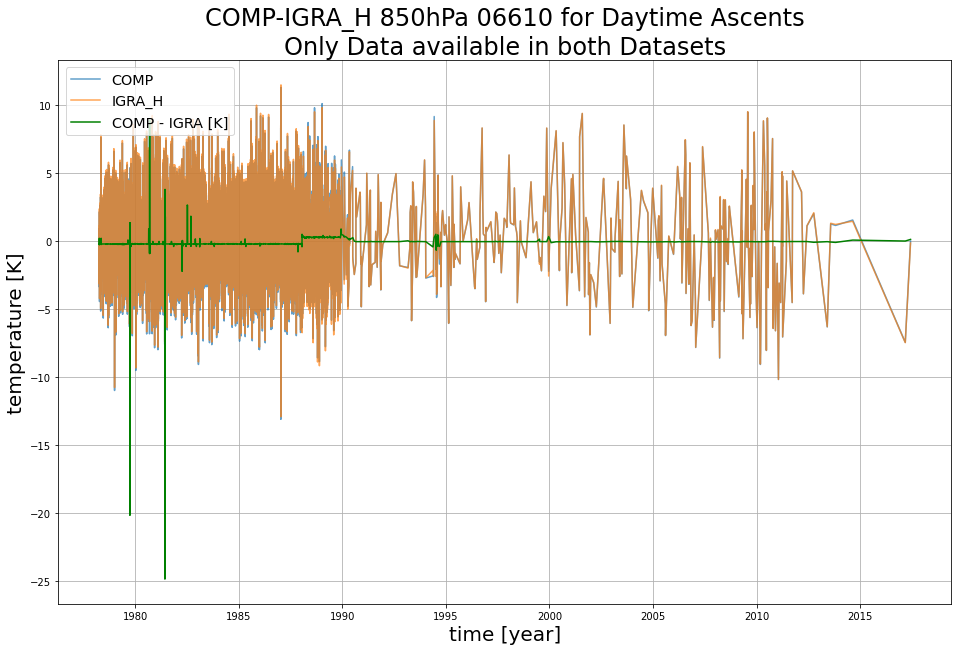

DIFF MEAN: -0.10547835053039022
DIFF MIN: -24.847137451171875
DIFF MAX: 8.909994942801347


In [27]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

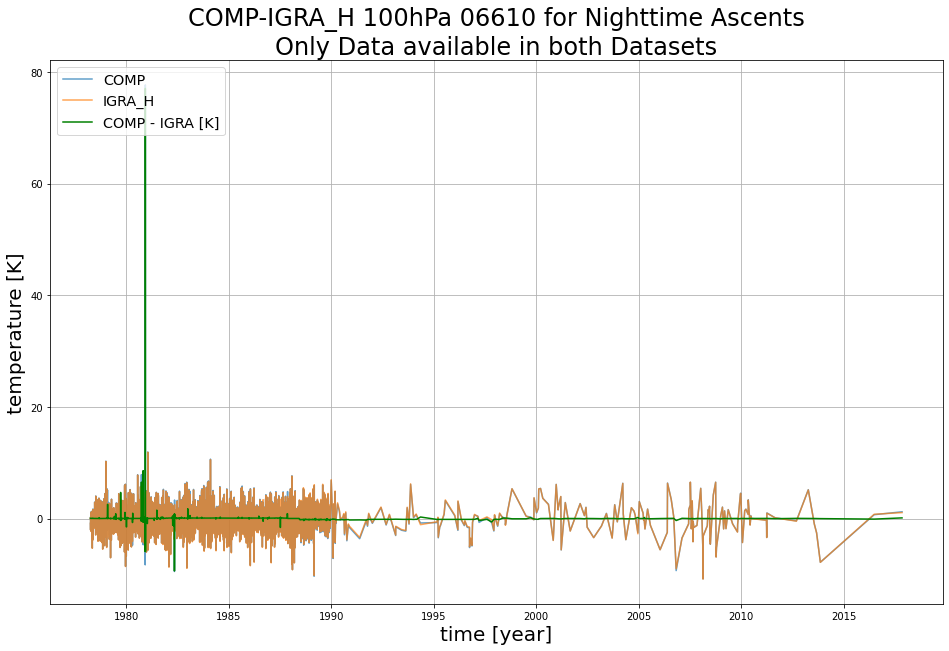

DIFF MEAN: 0.06582263286981709
DIFF MIN: -9.36143057686948
DIFF MAX: 77.02859170096261


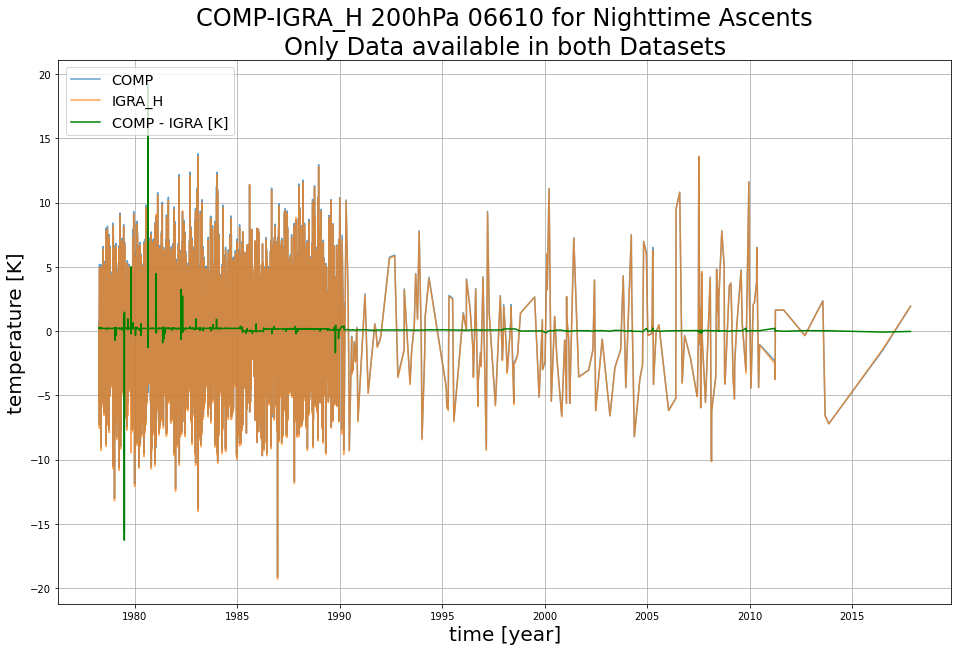

DIFF MEAN: 0.16730521235990886
DIFF MIN: -16.266428266252774
DIFF MAX: 19.14785875592915


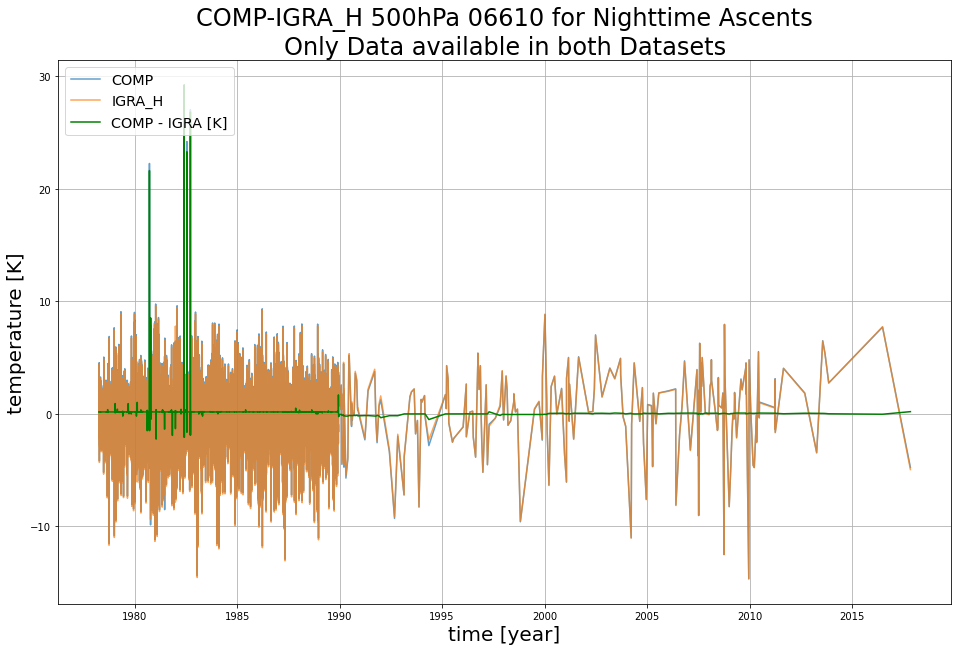

DIFF MEAN: 0.16652547349228297
DIFF MIN: -2.249282836914034
DIFF MAX: 29.229287283761153


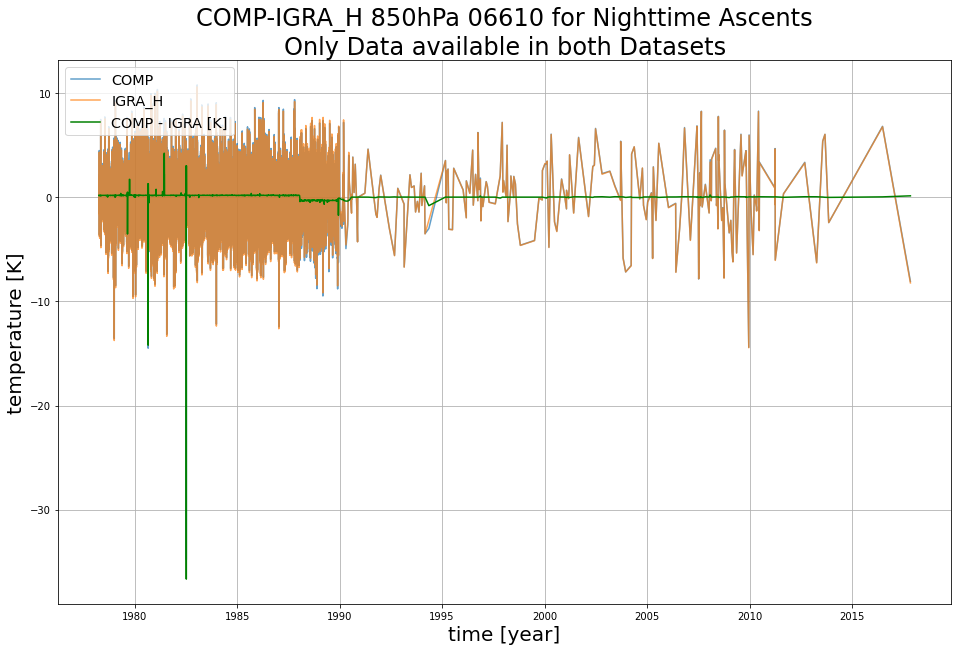

DIFF MEAN: 0.10739336108347648
DIFF MIN: -36.674269539969316
DIFF MAX: 4.232877458844882


In [28]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

## Distribution of Adjustments

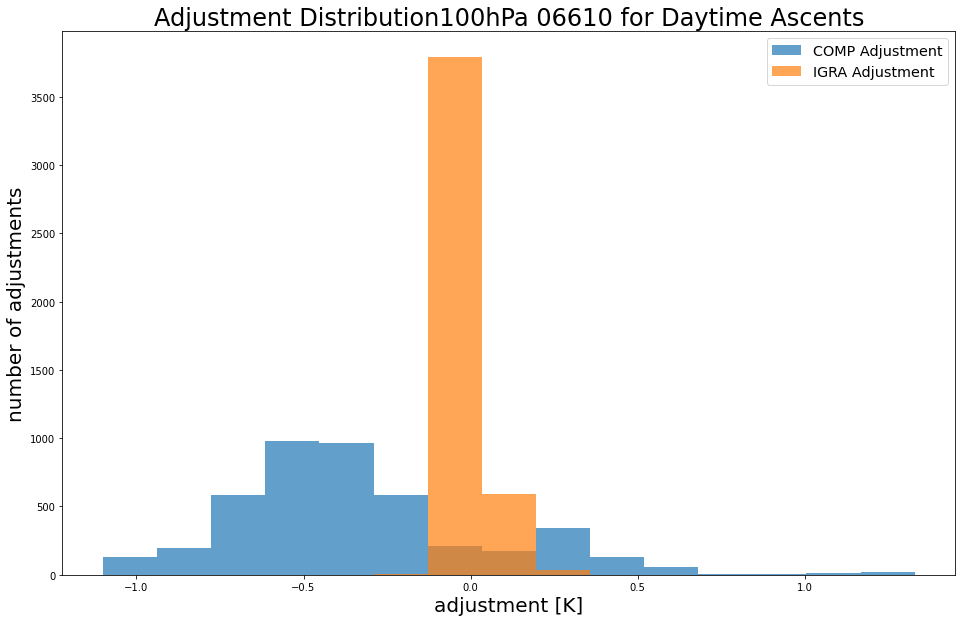

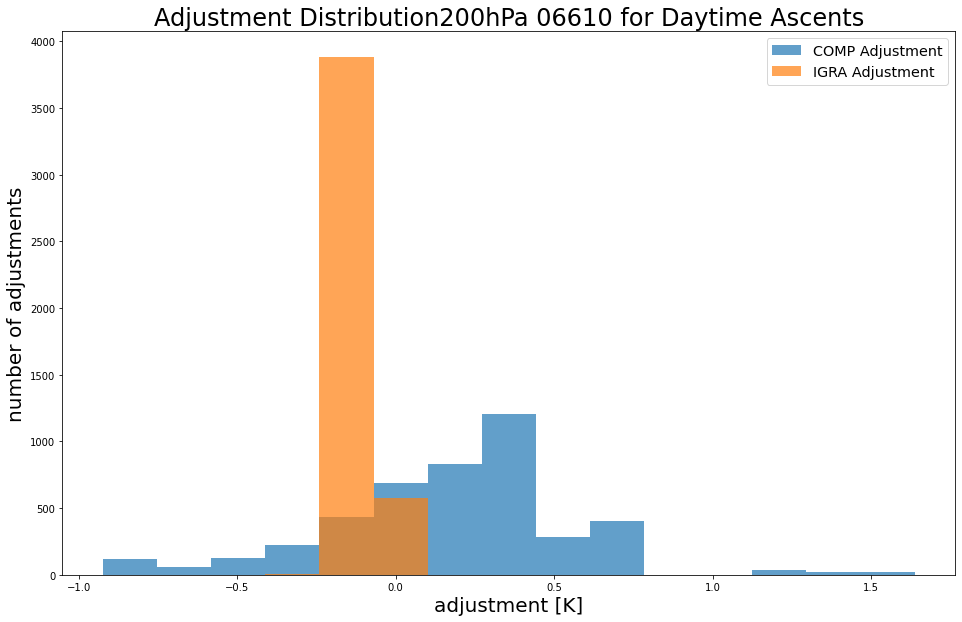

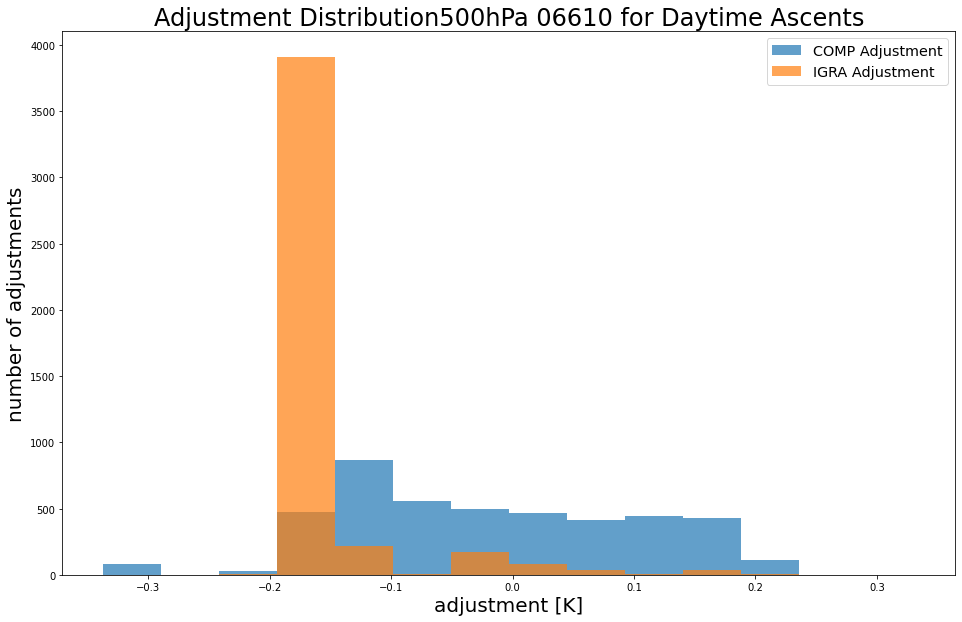

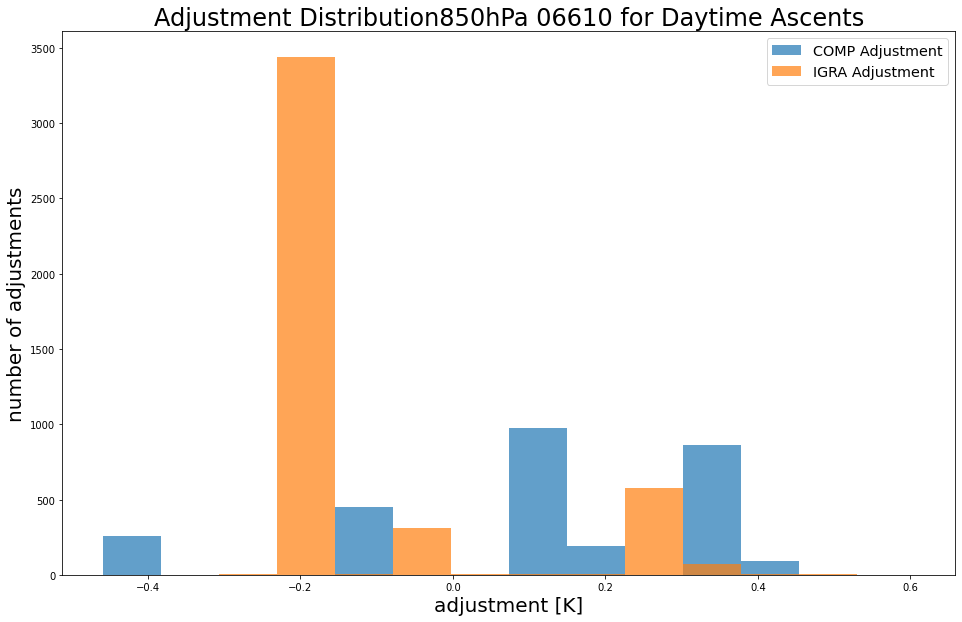

In [29]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment Distribution'+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

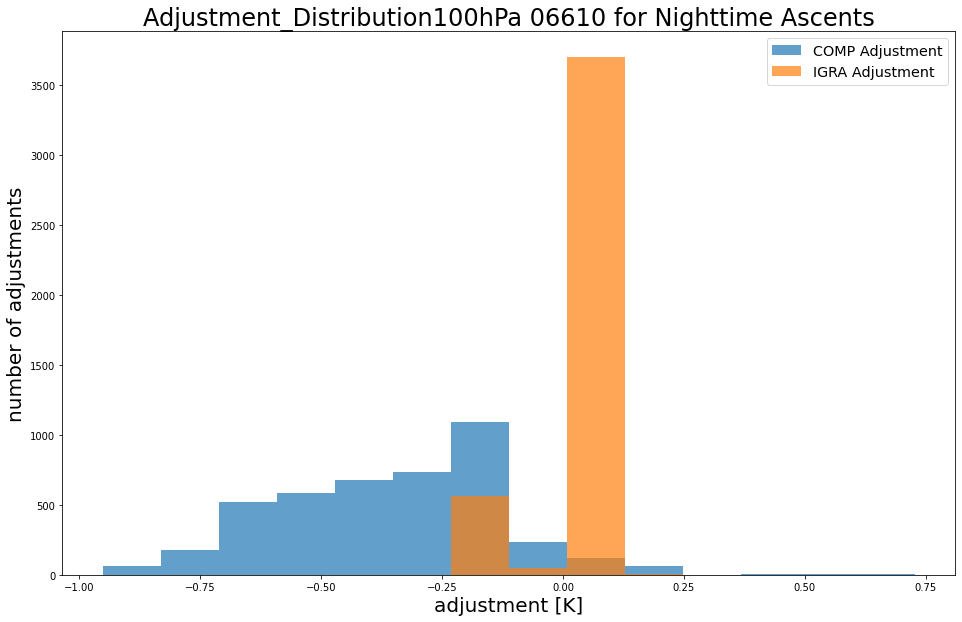

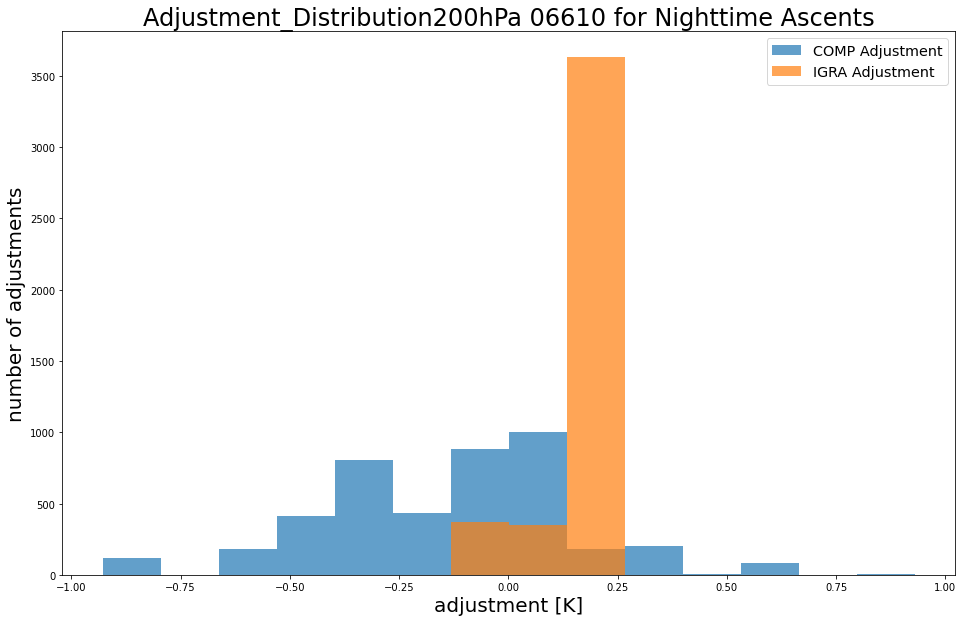

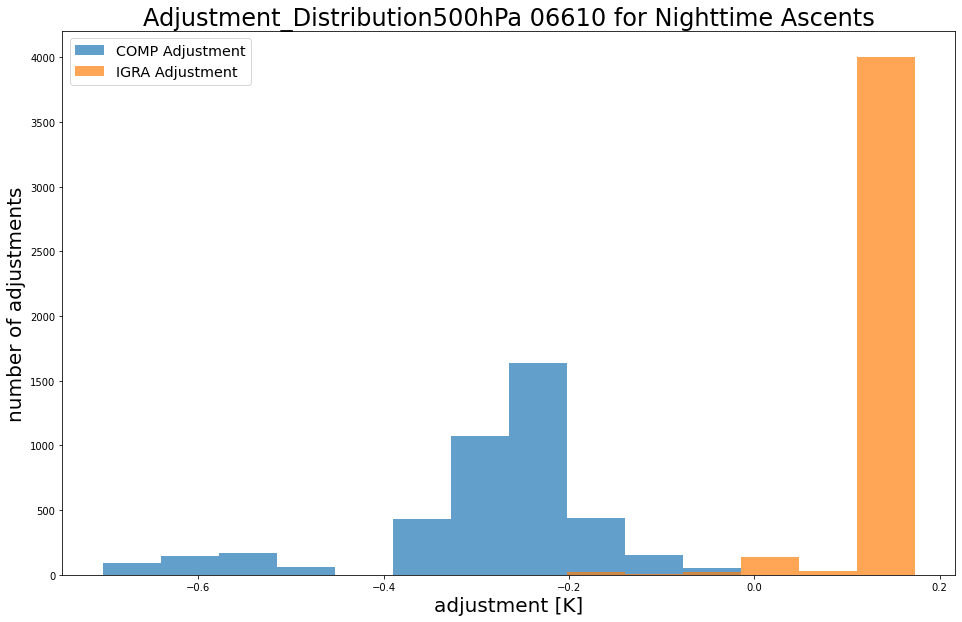

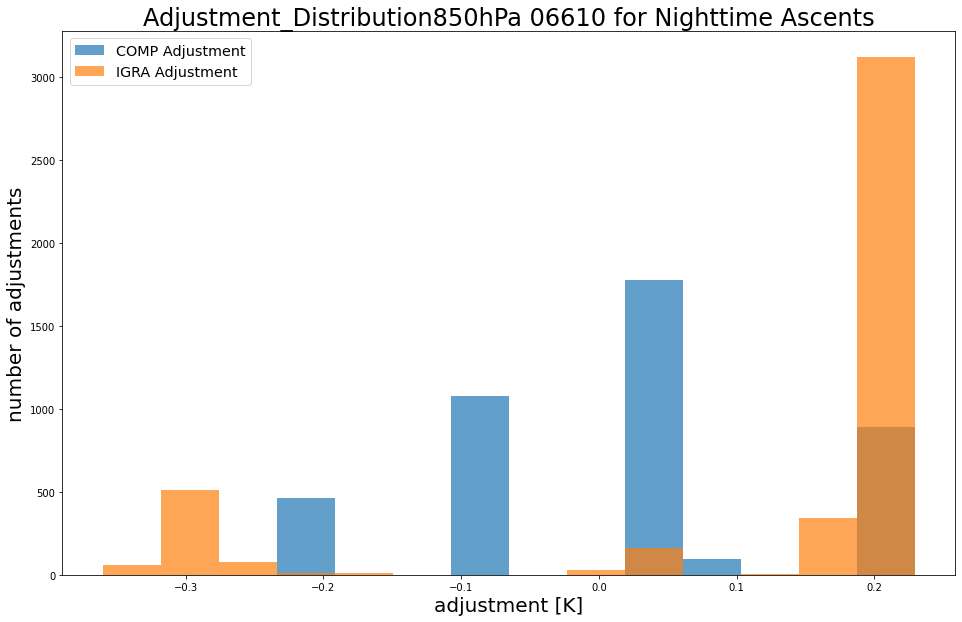

In [30]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)